# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:25:47.084462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:25:50.599732
2025-04-14 23:25:50.599732


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:25:45"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

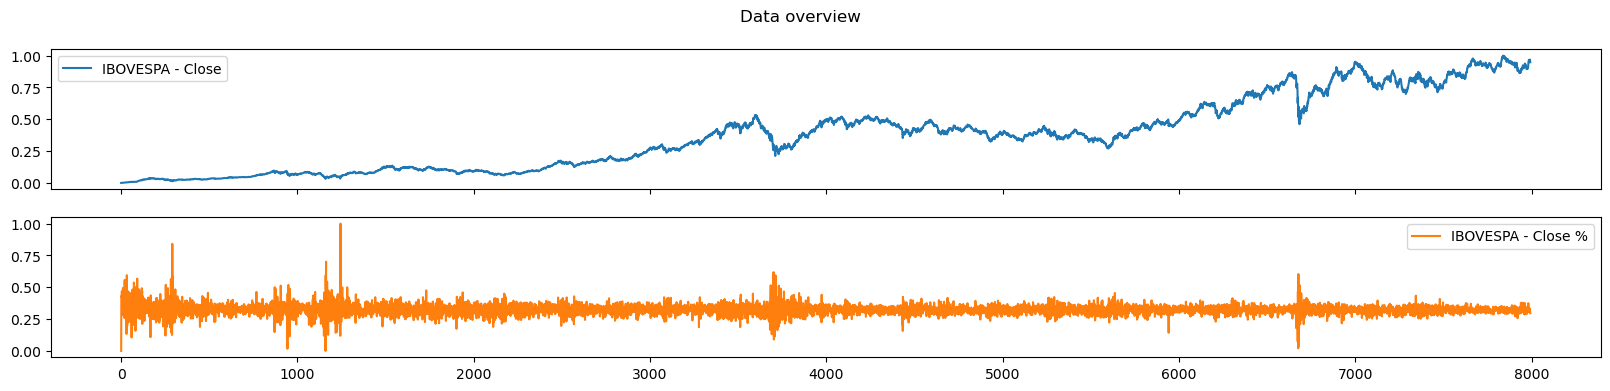

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

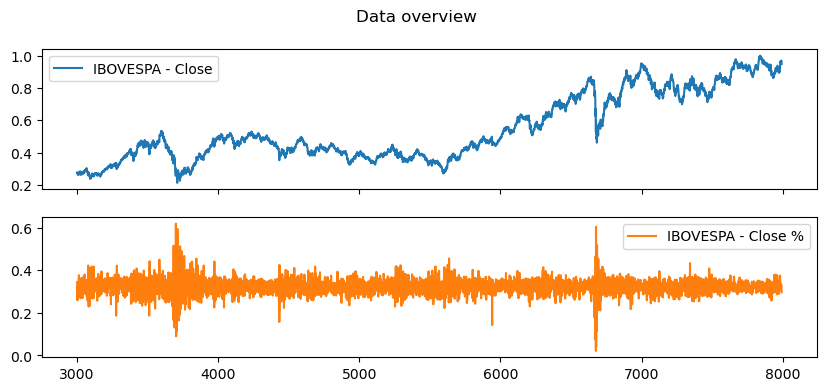

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

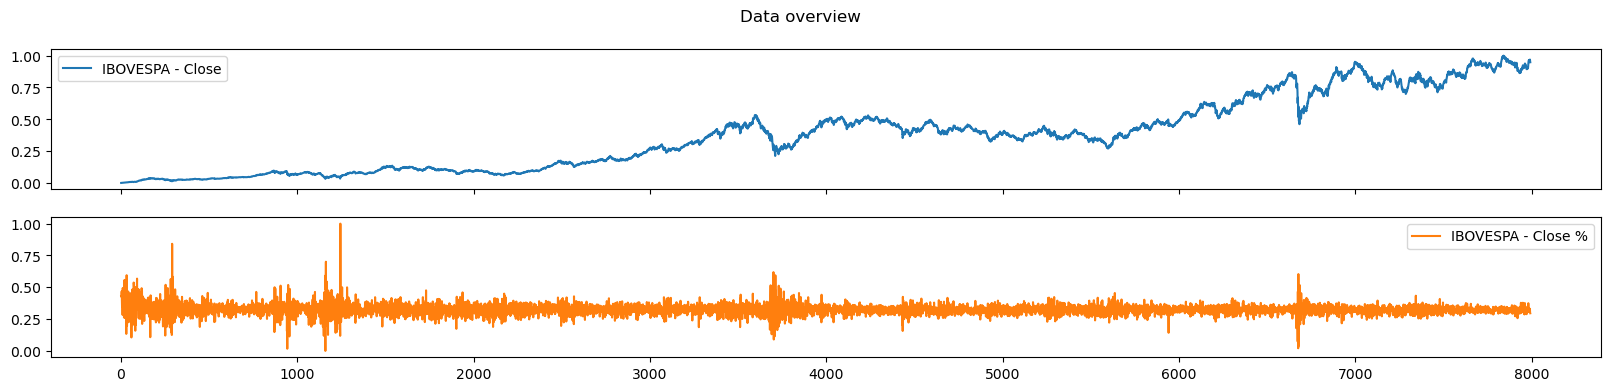

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

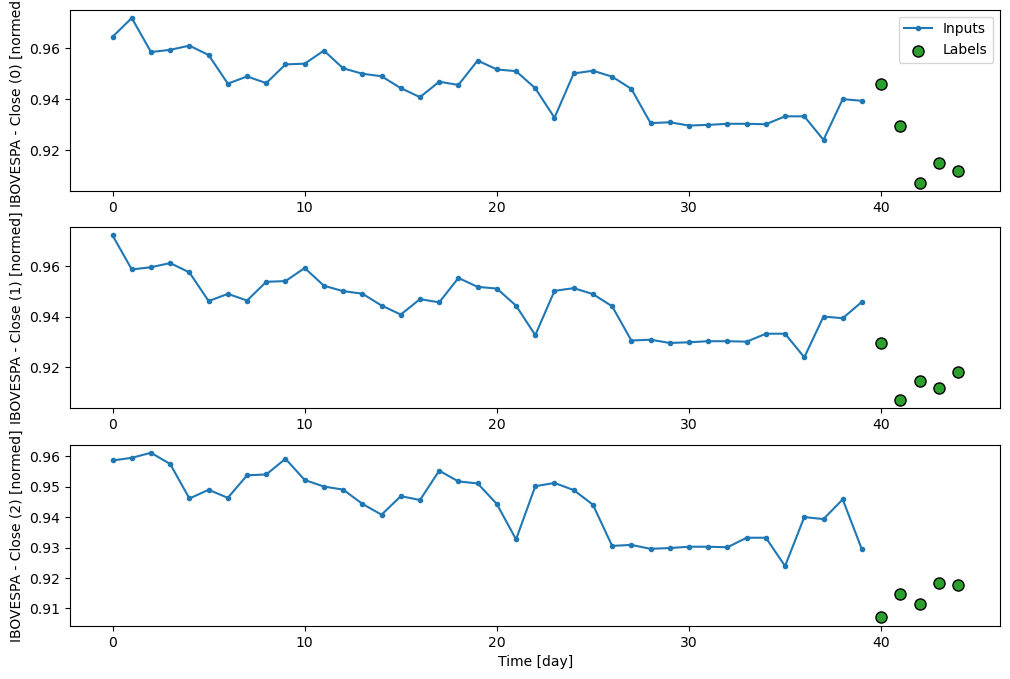

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21:57 6s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 86.3426 - mean_squared_error: 8.5936e-05 - root_mean_squared_error: 0.0090  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 79.5138 - mean_squared_error: 1.3133e-04 - root_mean_squared_error: 0.0110

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 75.8951 - mean_squared_error: 1.7004e-04 - root_mean_squared_error: 0.0126

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.0217 - mean_squared_error: 1.8514e-04 - root_mean_squared_error: 0.0132

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.9563 - mean_squared_error: 1.8860e-04 - root_mean_squared_error: 0.0134

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.7690 - mean_squared_error: 1.8643e-04 - root_mean_squared_error: 0.0134

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.9040 - mean_squared_error: 1.8237e-04 - root_mean_squared_error: 0.0132

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.3599 - mean_squared_error: 1.7781e-04 - root_mean_squared_error: 0.0131

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.0228 - mean_squared_error: 1.7300e-04 - root_mean_squared_error: 0.0129

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.8557 - mean_squared_error: 1.6810e-04 - root_mean_squared_error: 0.0127

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.8651 - mean_squared_error: 1.6351e-04 - root_mean_squared_error: 0.0126

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.1523 - mean_squared_error: 1.6126e-04 - root_mean_squared_error: 0.0125

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.6662 - mean_squared_error: 1.6216e-04 - root_mean_squared_error: 0.0125

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.3160 - mean_squared_error: 1.6377e-04 - root_mean_squared_error: 0.0126

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.1661 - mean_squared_error: 1.6748e-04 - root_mean_squared_error: 0.0128

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.0723 - mean_squared_error: 1.7023e-04 - root_mean_squared_error: 0.0129

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.0481 - mean_squared_error: 1.7238e-04 - root_mean_squared_error: 0.0130

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.1387 - mean_squared_error: 1.7448e-04 - root_mean_squared_error: 0.0130

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3004 - mean_squared_error: 1.7642e-04 - root_mean_squared_error: 0.0131

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.5403 - mean_squared_error: 1.7891e-04 - root_mean_squared_error: 0.0132

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.8083 - mean_squared_error: 1.8090e-04 - root_mean_squared_error: 0.0133

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.1022 - mean_squared_error: 1.8251e-04 - root_mean_squared_error: 0.0134

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 42.4436 - mean_squared_error: 1.8494e-04 - root_mean_squared_error: 0.0135

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 41.8173 - mean_squared_error: 1.8736e-04 - root_mean_squared_error: 0.0135

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 41.2068 - mean_squared_error: 1.8933e-04 - root_mean_squared_error: 0.0136

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 40.6177 - mean_squared_error: 1.9098e-04 - root_mean_squared_error: 0.0137

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 40.3317 - mean_squared_error: 1.9174e-04 - root_mean_squared_error: 0.0137

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 40.0493 - mean_squared_error: 1.9240e-04 - root_mean_squared_error: 0.0137

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 39.7702 - mean_squared_error: 1.9298e-04 - root_mean_squared_error: 0.0138

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 39.4945 - mean_squared_error: 1.9347e-04 - root_mean_squared_error: 0.0138

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 39.2236 - mean_squared_error: 1.9390e-04 - root_mean_squared_error: 0.0138

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 38.9635 - mean_squared_error: 1.9440e-04 - root_mean_squared_error: 0.0138

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 38.7069 - mean_squared_error: 1.9483e-04 - root_mean_squared_error: 0.0138

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 38.2094 - mean_squared_error: 1.9560e-04 - root_mean_squared_error: 0.0139

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.7297 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0139

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 37.2789 - mean_squared_error: 1.9692e-04 - root_mean_squared_error: 0.0139

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.8623 - mean_squared_error: 1.9779e-04 - root_mean_squared_error: 0.0139

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.4570 - mean_squared_error: 1.9847e-04 - root_mean_squared_error: 0.0140

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 36.0706 - mean_squared_error: 1.9922e-04 - root_mean_squared_error: 0.0140

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 35.7102 - mean_squared_error: 2.0044e-04 - root_mean_squared_error: 0.0140

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 35.3806 - mean_squared_error: 2.0338e-04 - root_mean_squared_error: 0.0141

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 35.0810 - mean_squared_error: 2.0911e-04 - root_mean_squared_error: 0.0143

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 34.7968 - mean_squared_error: 2.1541e-04 - root_mean_squared_error: 0.0145

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 34.5182 - mean_squared_error: 2.2132e-04 - root_mean_squared_error: 0.0147

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 34.2447 - mean_squared_error: 2.2687e-04 - root_mean_squared_error: 0.0148

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 33.9771 - mean_squared_error: 2.3218e-04 - root_mean_squared_error: 0.0150

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 33.7171 - mean_squared_error: 2.3746e-04 - root_mean_squared_error: 0.0151

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 33.4635 - mean_squared_error: 2.4263e-04 - root_mean_squared_error: 0.0153

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 33.2169 - mean_squared_error: 2.4792e-04 - root_mean_squared_error: 0.0154

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 32.9812 - mean_squared_error: 2.5456e-04 - root_mean_squared_error: 0.0156

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 32.7526 - mean_squared_error: 2.6173e-04 - root_mean_squared_error: 0.0158

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 32.5276 - mean_squared_error: 2.6860e-04 - root_mean_squared_error: 0.0159

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 32.3059 - mean_squared_error: 2.7521e-04 - root_mean_squared_error: 0.0161

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 32.0879 - mean_squared_error: 2.8167e-04 - root_mean_squared_error: 0.0163

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 31.8717 - mean_squared_error: 2.8776e-04 - root_mean_squared_error: 0.0164

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 31.6586 - mean_squared_error: 2.9372e-04 - root_mean_squared_error: 0.0166

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 31.4503 - mean_squared_error: 3.0049e-04 - root_mean_squared_error: 0.0168

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 31.2450 - mean_squared_error: 3.0722e-04 - root_mean_squared_error: 0.0169

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 31.0418 - mean_squared_error: 3.1368e-04 - root_mean_squared_error: 0.0171

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 30.8447 - mean_squared_error: 3.2135e-04 - root_mean_squared_error: 0.0173

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 30.6623 - mean_squared_error: 3.3394e-04 - root_mean_squared_error: 0.0175

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 30.4870 - mean_squared_error: 3.4740e-04 - root_mean_squared_error: 0.0178

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 30.3168 - mean_squared_error: 3.6158e-04 - root_mean_squared_error: 0.0181

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 30.1562 - mean_squared_error: 3.8021e-04 - root_mean_squared_error: 0.0184

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 30.0074 - mean_squared_error: 4.0963e-04 - root_mean_squared_error: 0.0189

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 29.8703 - mean_squared_error: 4.5208e-04 - root_mean_squared_error: 0.0195

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 29.7432 - mean_squared_error: 5.0451e-04 - root_mean_squared_error: 0.0201

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 29.6235 - mean_squared_error: 5.6132e-04 - root_mean_squared_error: 0.0208

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 29.5079 - mean_squared_error: 6.1905e-04 - root_mean_squared_error: 0.0215

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 29.3920 - mean_squared_error: 6.7440e-04 - root_mean_squared_error: 0.0222

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 29.2757 - mean_squared_error: 7.2728e-04 - root_mean_squared_error: 0.0228

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 29.1599 - mean_squared_error: 7.7804e-04 - root_mean_squared_error: 0.0234

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 29.0447 - mean_squared_error: 8.2678e-04 - root_mean_squared_error: 0.0240

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 28.9310 - mean_squared_error: 8.7410e-04 - root_mean_squared_error: 0.0246

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 28.8197 - mean_squared_error: 9.2072e-04 - root_mean_squared_error: 0.0251

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 28.7082 - mean_squared_error: 9.6538e-04 - root_mean_squared_error: 0.0257

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 28.5968 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0262    

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 28.4852 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0267

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 28.3748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 28.2670 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 28.1599 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0281

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 28.0527 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 27.9460 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 27.8414 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0294

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 27.7395 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 27.6388 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 27.5388 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0306

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 27.4396 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 27.3415 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 27.2460 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0317

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 27.1993 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0319

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 27.1059 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0322

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 27.0133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 26.9224 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 26.8335 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0332

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 26.7465 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0335

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 26.6609 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 26.5772 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 26.4953 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0345

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 26.4149 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0348

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 26.3347 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 26.2547 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 26.1749 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0357

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 26.0952 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 26.0156 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 25.9758 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 25.9360 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 25.8964 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0366

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 25.8568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0367

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 25.8184 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0369

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 25.7812 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 25.7447 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 25.7085 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 25.6365 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 25.5655 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0380

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 25.4957 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 25.4277 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 25.3604 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 25.2931 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 25.2259 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0397

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 25.1593 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0400

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 25.0930 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0403

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 25.0267 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0406

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 24.9605 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0409

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 24.8947 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0412

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 24.7975 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0417 - val_loss: 0.1446 - val_mean_absolute_error: 0.1446 - val_mean_absolute_percentage_error: 15.3927 - val_mean_squared_error: 0.0217 - val_root_mean_squared_error: 0.1475 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 0.7598 - mean_absolute_error: 0.7598 - mean_absolute_percentage_error: 10090.1084 - mean_squared_error: 0.5773 - root_mean_squared_error: 0.7598

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7589 - mean_absolute_error: 0.7589 - mean_absolute_percentage_error: 8419.9912 - mean_squared_error: 0.5760 - root_mean_squared_error: 0.7589  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7534 - mean_absolute_error: 0.7534 - mean_absolute_percentage_error: 7147.0483 - mean_squared_error: 0.5678 - root_mean_squared_error: 0.7535

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 6332.2729 - mean_squared_error: 0.5567 - root_mean_squared_error: 0.7460

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.7357 - mean_absolute_error: 0.7357 - mean_absolute_percentage_error: 5804.1050 - mean_squared_error: 0.5428 - root_mean_squared_error: 0.7365

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 5500.1128 - mean_squared_error: 0.5846 - root_mean_squared_error: 0.7623

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7475 - mean_absolute_error: 0.7475 - mean_absolute_percentage_error: 5231.2329 - mean_squared_error: 0.6007 - root_mean_squared_error: 0.7728

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7432 - mean_absolute_error: 0.7432 - mean_absolute_percentage_error: 4995.9023 - mean_squared_error: 0.6043 - root_mean_squared_error: 0.7753

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7361 - mean_absolute_error: 0.7361 - mean_absolute_percentage_error: 4785.3325 - mean_squared_error: 0.6009 - root_mean_squared_error: 0.7734

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 4593.9243 - mean_squared_error: 0.5935 - root_mean_squared_error: 0.7686

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7166 - mean_absolute_error: 0.7166 - mean_absolute_percentage_error: 4417.7500 - mean_squared_error: 0.5833 - root_mean_squared_error: 0.7619

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7063 - mean_absolute_error: 0.7063 - mean_absolute_percentage_error: 4256.7798 - mean_squared_error: 0.5744 - root_mean_squared_error: 0.7559

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6988 - mean_absolute_error: 0.6988 - mean_absolute_percentage_error: 4112.8447 - mean_squared_error: 0.5683 - root_mean_squared_error: 0.7519

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6909 - mean_absolute_error: 0.6909 - mean_absolute_percentage_error: 3978.8601 - mean_squared_error: 0.5612 - root_mean_squared_error: 0.7471

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - mean_absolute_percentage_error: 3852.8044 - mean_squared_error: 0.5528 - root_mean_squared_error: 0.7413

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6717 - mean_absolute_error: 0.6717 - mean_absolute_percentage_error: 3734.4800 - mean_squared_error: 0.5437 - root_mean_squared_error: 0.7349

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6611 - mean_absolute_error: 0.6611 - mean_absolute_percentage_error: 3623.2310 - mean_squared_error: 0.5342 - root_mean_squared_error: 0.7281

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6503 - mean_absolute_error: 0.6503 - mean_absolute_percentage_error: 3518.6707 - mean_squared_error: 0.5246 - root_mean_squared_error: 0.7210

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - mean_absolute_percentage_error: 3420.3911 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7137

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 3327.8413 - mean_squared_error: 0.5052 - root_mean_squared_error: 0.7065

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6178 - mean_absolute_error: 0.6178 - mean_absolute_percentage_error: 3240.5242 - mean_squared_error: 0.4958 - root_mean_squared_error: 0.6992

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6072 - mean_absolute_error: 0.6072 - mean_absolute_percentage_error: 3158.0203 - mean_squared_error: 0.4865 - root_mean_squared_error: 0.6920

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5967 - mean_absolute_error: 0.5967 - mean_absolute_percentage_error: 3079.9597 - mean_squared_error: 0.4775 - root_mean_squared_error: 0.6849

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 3006.0176 - mean_squared_error: 0.4687 - root_mean_squared_error: 0.6779

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_absolute_percentage_error: 2935.9058 - mean_squared_error: 0.4601 - root_mean_squared_error: 0.6711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5671 - mean_absolute_error: 0.5671 - mean_absolute_percentage_error: 2869.3147 - mean_squared_error: 0.4519 - root_mean_squared_error: 0.6643

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_absolute_percentage_error: 2805.9873 - mean_squared_error: 0.4439 - root_mean_squared_error: 0.6578

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5487 - mean_absolute_error: 0.5487 - mean_absolute_percentage_error: 2745.7004 - mean_squared_error: 0.4362 - root_mean_squared_error: 0.6513

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5399 - mean_absolute_error: 0.5399 - mean_absolute_percentage_error: 2688.2429 - mean_squared_error: 0.4287 - root_mean_squared_error: 0.6451

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 2633.4082 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6389

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5231 - mean_absolute_error: 0.5231 - mean_absolute_percentage_error: 2581.0386 - mean_squared_error: 0.4145 - root_mean_squared_error: 0.6329

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - mean_absolute_percentage_error: 2530.9702 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6271

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5074 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 2483.0632 - mean_squared_error: 0.4012 - root_mean_squared_error: 0.6214

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5000 - mean_absolute_error: 0.5000 - mean_absolute_percentage_error: 2437.2034 - mean_squared_error: 0.3949 - root_mean_squared_error: 0.6159

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4927 - mean_absolute_error: 0.4928 - mean_absolute_percentage_error: 2393.2302 - mean_squared_error: 0.3888 - root_mean_squared_error: 0.6105

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_absolute_percentage_error: 2351.0259 - mean_squared_error: 0.3829 - root_mean_squared_error: 0.6052

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4823 - mean_absolute_error: 0.4823 - mean_absolute_percentage_error: 2330.5522 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.6026

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2290.7869 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.5975

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2252.5198 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5926

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4629 - mean_absolute_error: 0.4629 - mean_absolute_percentage_error: 2215.6655 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5877

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 2197.7446 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5853

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4568 - mean_absolute_error: 0.4568 - mean_absolute_percentage_error: 2180.1501 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5830

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 2162.8706 - mean_squared_error: 0.3560 - root_mean_squared_error: 0.5807

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4509 - mean_absolute_error: 0.4509 - mean_absolute_percentage_error: 2145.8979 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5784

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2129.2241 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5761

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2112.8413 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5739

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4423 - mean_absolute_error: 0.4423 - mean_absolute_percentage_error: 2096.7412 - mean_squared_error: 0.3464 - root_mean_squared_error: 0.5716

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4368 - mean_absolute_error: 0.4368 - mean_absolute_percentage_error: 2065.3594 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5673

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2035.0226 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5630

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 2005.6754 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5589

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 1977.2705 - mean_squared_error: 0.3287 - root_mean_squared_error: 0.5548

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 1949.7634 - mean_squared_error: 0.3246 - root_mean_squared_error: 0.5508

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 1923.1069 - mean_squared_error: 0.3206 - root_mean_squared_error: 0.5469

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 1897.2609 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5431

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 1872.1869 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5394

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1847.8501 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5357

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1824.2186 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5322

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 1801.2599 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5286

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1778.9443 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5252

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1757.2454 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5218

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 1736.1365 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5185

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3736 - mean_absolute_error: 0.3736 - mean_absolute_percentage_error: 1715.6023 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5153

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1695.6273 - mean_squared_error: 0.2860 - root_mean_squared_error: 0.5122

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1685.8398 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5106

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1676.1798 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5091

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1666.6438 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5076

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 1657.2297 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5061

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1647.9358 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5046

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1638.7603 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5031

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1629.7010 - mean_squared_error: 0.2759 - root_mean_squared_error: 0.5016

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1620.7560 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.5002

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1611.9226 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.4988

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1603.1990 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.4973

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1594.5823 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4959

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1577.6617 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4932

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1569.3539 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4918

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1561.1451 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.4905

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1545.0160 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4878

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1529.2584 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4852

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1513.8608 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4826

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1498.8135 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4801

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1484.1021 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4776

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1469.7131 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4752

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1455.6373 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4728

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1441.8617 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4704

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1428.3766 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4681

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1415.1722 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4658

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 1408.6727 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4646

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1402.2402 - mean_squared_error: 0.2404 - root_mean_squared_error: 0.4635

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1395.8734 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4624

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1389.5713 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4613

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1377.1571 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4591

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1371.0432 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4580

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1364.9901 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4569

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1358.9969 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4559

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1347.1875 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4538

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1341.3690 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4527

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1329.9001 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4506

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1318.6497 - mean_squared_error: 0.2271 - root_mean_squared_error: 0.4486

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1307.6110 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4466

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1296.7789 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4446

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1291.4386 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4436

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1280.9071 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4417

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1270.5668 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4398

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1265.4668 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4388

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1260.4130 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4379

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1250.4417 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4360

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1240.6477 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4342

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1231.0264 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4324

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1221.5725 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4306

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1212.2823 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4289

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1203.1512 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4271

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1194.1750 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4254

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1185.3483 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4237

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1176.6670 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4221

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1168.1278 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4204

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1159.7267 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4188

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1155.5768 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4180

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1147.3760 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4164

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1139.3044 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4149

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1131.3600 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4133

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1123.5419 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4118

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1115.8451 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4103

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1108.2660 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4088

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1100.8019 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4073

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1093.4503 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4059

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1086.2086 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4044

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1079.0736 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4030

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1072.0430 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4016

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1065.1144 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4002

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1058.2855 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3989

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1051.5541 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3975

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1044.9176 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3962

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1038.3743 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3949

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1035.1370 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3942

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1028.7340 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3929

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1025.5724 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3923 - val_loss: 0.1433 - val_mean_absolute_error: 0.1433 - val_mean_absolute_percentage_error: 15.2557 - val_mean_squared_error: 0.0215 - val_root_mean_squared_error: 0.1467 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 34s 146ms/step - loss: 0.7098 - mean_absolute_error: 0.7098 - mean_absolute_percentage_error: 9425.6152 - mean_squared_error: 0.5038 - root_mean_squared_error: 0.7098

  2/237 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - loss: 0.7092 - mean_absolute_error: 0.7092 - mean_absolute_percentage_error: 8655.9219 - mean_squared_error: 0.5029 - root_mean_squared_error: 0.7092

  3/237 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 7851.8691 - mean_squared_error: 0.5002 - root_mean_squared_error: 0.7072 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.7046 - mean_absolute_error: 0.7046 - mean_absolute_percentage_error: 7189.4082 - mean_squared_error: 0.4966 - root_mean_squared_error: 0.7046

  5/237 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 6662.1040 - mean_squared_error: 0.4926 - root_mean_squared_error: 0.7018

  6/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.6988 - mean_absolute_error: 0.6988 - mean_absolute_percentage_error: 6241.5654 - mean_squared_error: 0.4886 - root_mean_squared_error: 0.6989

  8/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.6927 - mean_absolute_error: 0.6927 - mean_absolute_percentage_error: 5643.9756 - mean_squared_error: 0.4804 - root_mean_squared_error: 0.6930

 10/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 5239.4717 - mean_squared_error: 0.4716 - root_mean_squared_error: 0.6865

 12/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.6786 - mean_absolute_error: 0.6786 - mean_absolute_percentage_error: 4925.3135 - mean_squared_error: 0.4620 - root_mean_squared_error: 0.6793

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 4666.2993 - mean_squared_error: 0.4516 - root_mean_squared_error: 0.6714

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.6609 - mean_absolute_error: 0.6609 - mean_absolute_percentage_error: 4443.9897 - mean_squared_error: 0.4406 - root_mean_squared_error: 0.6629

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.6508 - mean_absolute_error: 0.6508 - mean_absolute_percentage_error: 4247.3848 - mean_squared_error: 0.4292 - root_mean_squared_error: 0.6538

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.6397 - mean_absolute_error: 0.6397 - mean_absolute_percentage_error: 4069.4387 - mean_squared_error: 0.4174 - root_mean_squared_error: 0.6442

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6275 - mean_absolute_error: 0.6275 - mean_absolute_percentage_error: 3906.1404 - mean_squared_error: 0.4053 - root_mean_squared_error: 0.6341

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.6210 - mean_absolute_error: 0.6210 - mean_absolute_percentage_error: 3828.9907 - mean_squared_error: 0.3993 - root_mean_squared_error: 0.6290

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 3683.5159 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6188

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_absolute_percentage_error: 3549.1462 - mean_squared_error: 0.3761 - root_mean_squared_error: 0.6087

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - mean_absolute_percentage_error: 3485.7278 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.6038

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3424.6025 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5989

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 3365.6855 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5941

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.5679 - mean_absolute_error: 0.5679 - mean_absolute_percentage_error: 3308.8967 - mean_squared_error: 0.3547 - root_mean_squared_error: 0.5894

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.5614 - mean_absolute_error: 0.5614 - mean_absolute_percentage_error: 3254.1292 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5847

 33/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.5550 - mean_absolute_error: 0.5550 - mean_absolute_percentage_error: 3201.2988 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5801

 34/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 3150.3022 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5756

 35/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 3101.0664 - mean_squared_error: 0.3353 - root_mean_squared_error: 0.5712

 36/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.5365 - mean_absolute_error: 0.5365 - mean_absolute_percentage_error: 3053.5066 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5668

 37/237 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 3007.5298 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5626

 39/237 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 2920.0698 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5543

 41/237 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.5079 - mean_absolute_error: 0.5079 - mean_absolute_percentage_error: 2838.1282 - mean_squared_error: 0.3099 - root_mean_squared_error: 0.5464

 43/237 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2761.1357 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5387

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.4870 - mean_absolute_error: 0.4870 - mean_absolute_percentage_error: 2688.6641 - mean_squared_error: 0.2950 - root_mean_squared_error: 0.5314

 46/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - mean_absolute_percentage_error: 2653.9924 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5278

 48/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.4724 - mean_absolute_error: 0.4724 - mean_absolute_percentage_error: 2587.5601 - mean_squared_error: 0.2848 - root_mean_squared_error: 0.5209

 49/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - mean_absolute_percentage_error: 2555.7192 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5175

 50/237 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2524.7427 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5142

 51/237 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 2494.5952 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5110

 52/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 2465.2444 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5078

 53/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 2436.6587 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5047

 54/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.4457 - mean_absolute_error: 0.4457 - mean_absolute_percentage_error: 2408.8108 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.5016

 55/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 2381.6694 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.4986

 56/237 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 2355.2063 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4956

 58/237 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.4296 - mean_absolute_error: 0.4296 - mean_absolute_percentage_error: 2304.2168 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4899

 60/237 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.4220 - mean_absolute_error: 0.4220 - mean_absolute_percentage_error: 2255.6616 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4843

 62/237 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2209.3718 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4790

 64/237 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 2165.1855 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4738

 66/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.4010 - mean_absolute_error: 0.4010 - mean_absolute_percentage_error: 2122.9651 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 2082.5806 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4639

 70/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 2043.8998 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4592

 72/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 2006.8206 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4546 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 1971.2340 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4502

 76/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1937.0427 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4459

 78/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1904.1641 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4417

 80/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.3600 - mean_absolute_error: 0.3600 - mean_absolute_percentage_error: 1872.5309 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4377

 82/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 1842.0691 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4337

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1827.2543 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4318

 84/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1812.7068 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4299

 85/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1798.4197 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4280

 86/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1784.3861 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4262

 87/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1770.5981 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4243

 89/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1743.7305 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4208

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1717.7662 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4173

 93/237 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1692.6588 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4139

 95/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1668.3650 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4106

 97/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1644.8477 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4073

 99/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1622.0693 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4042

101/237 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1599.9907 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.4011

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1578.5793 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3981

105/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1557.8070 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3952

107/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1537.6440 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3923

109/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1518.0621 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3895

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1499.0334 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3868

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1480.5353 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3841

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1462.5530 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3815

117/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1445.0723 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3790

119/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1428.0665 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3765

121/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1411.5082 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3741

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1395.3772 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3717

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1379.6593 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3694

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1364.3386 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3671

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1349.3986 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3649

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1334.8241 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3627

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1320.6007 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3606

135/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1306.7137 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3585

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1293.1525 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3564

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1279.9080 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3544

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1266.9680 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3524

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1254.3192 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3505

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1241.9519 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3485

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1229.8557 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3467

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1218.0211 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3448

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1206.4399 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3430

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1195.1034 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3412

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1184.0039 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3395

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1173.1332 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3377

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1162.4845 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3360

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1152.0505 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3343

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1141.8253 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3327

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1131.8019 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3311

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1121.9739 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3295

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1112.3353 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3279

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1102.8809 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3264

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1093.6058 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3248

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1084.5057 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3233

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1075.5740 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3218

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1066.8060 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3204

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1058.1984 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3189

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1049.7463 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3175

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1041.4457 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3161

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1033.2916 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3148

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1025.2806 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3134

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1017.4088 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3121

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1009.6722 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3108

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1002.0663 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3095

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 994.5875 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3082 

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 987.2326 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3069

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 979.9984 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3057

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 972.8817 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3044

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 965.8793 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3032

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 958.9888 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3020

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 952.2097 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3009

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 945.5383 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2997

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 938.9713 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.2986

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 932.5058 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2974

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 926.1399 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2963

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 919.8715 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2952

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 913.6976 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2942

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 907.6156 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2931

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 901.6234 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2920

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 895.7191 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2910

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 889.9006 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2900

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 884.1658 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2890

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 878.5129 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2880

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 872.9402 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2870

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 864.7380 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2855 - val_loss: 0.0874 - val_mean_absolute_error: 0.0874 - val_mean_absolute_percentage_error: 9.2786 - val_mean_squared_error: 0.0083 - val_root_mean_squared_error: 0.0910 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.5494 - mean_absolute_error: 0.5494 - mean_absolute_percentage_error: 7292.6426 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5497

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 6074.4863 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5478 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5436 - mean_absolute_error: 0.5436 - mean_absolute_percentage_error: 5155.1387 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5439

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5392 - mean_absolute_error: 0.5392 - mean_absolute_percentage_error: 4570.8086 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5396

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 4199.6724 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5347

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 3924.5339 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5289

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5207 - mean_absolute_error: 0.5207 - mean_absolute_percentage_error: 3699.7756 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5220

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 3506.7412 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.5139

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 3335.9480 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.5059

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 3185.3184 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4985

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4795 - mean_absolute_error: 0.4795 - mean_absolute_percentage_error: 3047.6870 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4906

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2922.6987 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4825

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 2807.9443 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4745

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 2702.3215 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4667

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4360 - mean_absolute_error: 0.4360 - mean_absolute_percentage_error: 2605.0962 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4590

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - mean_absolute_percentage_error: 2515.1021 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4516

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2431.7388 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4445

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2354.3469 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4376

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2282.3071 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4310

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3886 - mean_absolute_error: 0.3886 - mean_absolute_percentage_error: 2215.1929 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4246

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 2152.4270 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4185

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 2093.5376 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.4126

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 2038.1942 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.4070

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1986.0303 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.4016

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1936.7701 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3964

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1890.1733 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3914

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1846.0377 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3865

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1804.1614 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3819

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1764.3666 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3774

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1726.5051 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3731

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1690.4432 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1656.0518 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3648

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1623.2157 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3609

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1591.8419 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3571

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1561.8204 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3535

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1533.0679 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3499

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1505.4929 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3465

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1479.0192 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3431

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1453.5763 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3399

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1429.1038 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3367

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1405.5475 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3337

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1382.8524 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3307

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1360.9714 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3278

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1339.8585 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3250

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1319.4753 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3223

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1299.7804 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3196

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1280.7391 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3170

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1262.3169 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3145

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1244.4847 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3120

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1227.2122 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3096

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1210.4723 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3072

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1194.2391 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3049

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1178.4893 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3027

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1163.2007 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.3005

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1148.3524 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2983

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1133.9249 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2962

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1119.8999 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2942

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1106.2605 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2922

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1092.9908 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2902

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1080.0753 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2883

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1067.5001 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2864

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1055.2505 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2846

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 1043.3131 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2828

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1031.6760 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2810

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1020.3270 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2793

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1009.2557 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2776

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 998.4517 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2759 

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 987.9042 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2742

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 977.6050 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2726

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 967.5459 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2711

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 957.7172 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2695

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 948.1109 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2680

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 938.7189 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2665

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 934.1008 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2658

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 929.5336 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2650

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 925.0161 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2643

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 920.5476 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2636

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 916.1273 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2629

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 907.4286 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2615

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 898.9153 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2601

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 890.5800 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2587

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 882.4163 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2574

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 874.4189 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2561

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 866.5842 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2548

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 858.9075 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2535

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 851.3825 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2523

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 844.0040 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2510

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 836.7676 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2498

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 829.6704 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2486

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - mean_absolute_percentage_error: 826.1730 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2481

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 819.2784 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2469

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 812.5119 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2458

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 805.8699 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2446

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 799.3497 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2435

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 792.9479 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2424

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 786.6611 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2413

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 780.4852 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2403

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 774.4171 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2392

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 768.4536 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2382

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 762.5920 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2372

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 756.8301 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2362

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 751.1649 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2352

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 745.5943 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2342

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 740.1161 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2333

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 734.7275 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2323

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 729.4260 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2314

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 724.2092 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2305

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 719.0765 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2296

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 714.0248 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2287

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 709.0521 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2278

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 704.1570 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2269

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 699.3376 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2261

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 694.5917 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2252

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 689.9179 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2244

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 685.3151 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2236

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 680.7811 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2228

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 676.3140 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2220

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 674.1049 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2216

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 671.9121 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2212

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 667.5745 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2204

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 665.4292 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2201

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 663.2993 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2197

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 661.1848 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2193

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 659.0855 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2189

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 657.0012 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2186

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 654.9338 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2182

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 652.8839 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2178 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881 - val_mean_absolute_percentage_error: 9.3574 - val_mean_squared_error: 0.0083 - val_root_mean_squared_error: 0.0910 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.4396 - mean_absolute_error: 0.4396 - mean_absolute_percentage_error: 5834.1055 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4399

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 4855.7725 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4376 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 4115.0713 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4329

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 3639.6440 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4271

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 3328.5667 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.4202

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 3091.1519 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.4120

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 2892.5527 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.4027

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3864 - mean_absolute_error: 0.3864 - mean_absolute_percentage_error: 2718.3862 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3928

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 2565.2180 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3828

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 2431.7114 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3735

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 2313.8352 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3648

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 2208.0134 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3564

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 2112.1702 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3486

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 2025.1346 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3412

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1945.7817 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3342

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1873.0811 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3276

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1806.2836 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3213

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1744.7101 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3154

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1687.6776 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3098

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1634.7042 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.3046

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1585.3501 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2995

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1561.9114 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2971

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1539.2445 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2947

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1496.0699 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2902

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1455.5530 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2858

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1417.4456 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2817

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1399.2266 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2797

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1364.3311 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2758

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1331.3534 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2721

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1315.5336 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1285.1362 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2668

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1256.2968 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2634

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1228.8898 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2602

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 1202.8082 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2571

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1177.9542 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2541

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 1154.2495 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2512

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1131.6067 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2484

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 1109.9565 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2457

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 1089.2258 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2431

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 1079.1857 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2419

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 1059.7189 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2394

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1041.0284 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2370

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1023.0680 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2347

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1005.7930 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2324

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 989.1630 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2302 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 973.1419 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2281

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 957.6951 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2260

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 942.7920 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2240

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 928.4030 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2221

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 914.5015 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2202

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 901.0624 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2183

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 888.0656 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2165

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 875.4858 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2148

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 863.3030 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2131

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 851.4971 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2114

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 840.0499 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2098

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 828.9460 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2082

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 818.1681 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2067

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 807.7018 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2052

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 797.5334 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2037

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 787.6512 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2023

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 778.0428 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2009

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 768.6946 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.1995

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 759.5963 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.1982

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 750.7372 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1969

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 742.1070 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1956

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 733.6972 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1943

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 725.4989 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1931

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 717.5033 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1919

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 709.7033 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1907

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 702.0912 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1896

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 694.6598 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1884

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 687.4028 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1873

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 680.3144 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1862

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 673.3883 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1851

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 666.6187 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1841

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 659.9999 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1830

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 653.5264 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1820

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 647.1933 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1810

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 640.9962 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1800

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 634.9305 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1791

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 628.9921 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1781

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 623.1765 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1772

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 617.4799 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1763

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 611.8987 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1754

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 606.4299 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1745

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 601.0701 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1736

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 595.8149 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1727

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 590.6617 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1719

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 585.6070 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1711

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 580.6489 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1702

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 575.7851 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1694

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 571.0131 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1686

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 566.3300 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1679

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 561.7323 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1671

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 557.2173 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1663

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 552.7827 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1656

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 548.4262 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1649

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 544.1456 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1641

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 539.9391 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1634

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 535.8045 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1627

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 531.7400 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1620

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 527.7439 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1614

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 523.8141 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1607

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 519.9492 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1600

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 516.1471 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1594

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 512.4069 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1587

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 508.7275 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1581

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 505.1065 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1574

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 501.5426 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1568

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 498.0349 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1562

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 494.5816 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 491.1815 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 487.8339 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 484.5373 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1539

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 481.2899 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1533

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 478.0909 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1528

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 474.9393 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1522

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 471.8337 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1517

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 468.7731 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1511

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 465.7562 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1506

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 462.7874 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1501 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357 - val_mean_absolute_percentage_error: 3.7756 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 4953.5000 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3730

  2/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 4535.7471 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3711

  4/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 3749.4307 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3648 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 3239.5603 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3578

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 2911.0620 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3509

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 2680.7759 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3436

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 2497.3193 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3358

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 2342.1511 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.3277

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 2205.7507 - mean_squared_error: 0.1033 - root_mean_squared_error: 0.3193

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 2085.1270 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.3112

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1979.4923 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.3036

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1886.4948 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2966

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1803.5005 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2901

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1728.4630 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2840

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1659.9825 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2783

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1597.3800 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2728

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1540.0189 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2677

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1487.2471 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2629

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1438.5596 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2583

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1393.3618 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2539

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1351.3384 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2498

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1312.1909 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2458

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1275.5991 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2421

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1241.2677 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2385

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1208.9664 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2351

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1178.5433 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2319

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 1149.8444 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2288

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 1122.7156 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2258

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1097.0026 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2229

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 1072.5939 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2201

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 1049.3916 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2175

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 1027.3030 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2149

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 1006.2479 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2125

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 986.1755 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2101 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 976.4865 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2089

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 967.0121 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2078

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 948.6792 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2056

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 939.8105 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2045

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 922.6371 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2024

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 906.1701 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2004

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 890.3589 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1984

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 875.1637 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1965

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 860.5566 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1946

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 846.4992 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1928

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 832.9529 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1911

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 819.8893 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1894

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 807.2831 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1877

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 795.1104 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1861

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 783.3467 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1846

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 771.9693 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1830

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 760.9619 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1816

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 750.3059 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1801

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 739.9813 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1787

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 729.9727 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1773

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 720.2664 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1760

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 710.8480 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1747

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 701.7036 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1734

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 692.8207 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1722

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 688.4736 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1716

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 684.1882 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1710

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 675.7988 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1698

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 667.6443 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1686

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 659.7108 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1675

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 651.9879 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1664

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 644.4688 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1653

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 637.1456 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1643

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 630.0098 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1633

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 623.0520 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1623

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 616.2650 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1613

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 609.6426 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1603

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 603.1790 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1594

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 596.8679 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1585

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 590.7038 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1576

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 584.6816 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1567

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 578.7975 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1558

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 573.0457 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1549

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 570.2177 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1545

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 567.4211 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1541

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 564.6550 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1537

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 561.9190 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1533

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 559.2127 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1529

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 556.5357 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1525

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 553.8876 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1521

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 551.2682 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1517

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 548.6768 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1513

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 546.1129 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1509

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 543.5756 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1505

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 541.0648 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1501

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 538.5799 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1497

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 536.1204 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1494

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 533.6863 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1490

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 528.8929 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1482

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 524.1968 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1475

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 519.5941 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1468

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 515.0815 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1461

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 510.6560 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1454

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 506.3161 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1447

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 502.0601 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1441

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 497.8850 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1434

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 493.7873 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1428

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 489.7650 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1421

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 485.8165 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1415

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 481.9396 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1409

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 478.1320 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1403

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 474.3914 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1397

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 470.7159 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1391

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 467.1036 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1385

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 463.5533 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1380

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 460.0638 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1374

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 456.6328 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1368

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 453.2588 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1363

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 449.9405 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1358

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 446.6765 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1352

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 443.4651 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1347

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 440.3057 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1342

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 437.1985 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1337

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 434.1412 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1332

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 431.1321 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1328

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 428.1694 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1323

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 425.2522 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1318

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 422.3794 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1314

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 419.5500 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1309

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 416.7630 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1305

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 414.0171 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1301

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 411.3114 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1297

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 408.6453 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1292

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 406.0178 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1288

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 403.4276 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1284

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 400.8742 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1280

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 398.3612 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1276 - val_loss: 0.0176 - val_mean_absolute_error: 0.0176 - val_mean_absolute_percentage_error: 1.8590 - val_mean_squared_error: 4.8410e-04 - val_root_mean_squared_error: 0.0220 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 4452.0718 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3352

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 3694.5137 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3318 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 3124.6272 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.3267

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 2759.3203 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.3214

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 2521.3806 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.3159

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 2341.6687 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.3098

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 2193.4746 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.3032

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 2066.0315 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2962

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1952.5006 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2891

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1851.3385 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1761.8676 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2756

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1682.3135 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2694

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1610.7590 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2637

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1545.7523 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2583

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1486.2803 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2532

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1431.7971 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2484

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1381.7253 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2438

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1335.5861 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2395

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1292.9243 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2354

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1253.2419 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2316

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 1216.2974 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1181.8149 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2244

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 1149.5179 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2210

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 1119.1616 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2178

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1090.5808 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2148

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 1063.6320 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2118

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1038.1812 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.2090

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 1014.0784 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2063

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 991.2140 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2038 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 969.5001 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2013

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 948.8444 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1989

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 929.1622 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1966

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 910.4016 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1944

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 892.5092 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1922

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 875.4053 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1901

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 859.0383 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1881

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 843.3657 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1862

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 828.3376 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1843

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 813.9066 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1825

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 800.0375 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1808

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 786.7043 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1791

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 773.8716 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1774

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 761.5043 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1758

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 749.5776 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1742

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 738.0685 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1727

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 726.9539 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1713

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 716.2105 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1698

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 705.8209 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1684

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 695.7679 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1671

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 686.0330 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1657

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 676.6012 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1644

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 667.4578 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 658.5889 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1619

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 649.9818 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1607

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 641.6248 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1596

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 633.5066 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1584

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 625.6166 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1573

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 617.9456 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1562

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 610.4849 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1551

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 603.2247 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1541

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 596.1569 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1530

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 589.2731 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1520

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 582.5659 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1511

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 576.0284 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1501

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 569.6540 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1492

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 563.4363 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1482

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 557.3693 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1473

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 551.4472 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1464

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 545.6650 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1456

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 540.0178 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1447

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 534.5005 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1439

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 529.1089 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1430

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 523.8382 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1422

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 518.6840 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1414

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 516.1494 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1410

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 513.6423 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1406

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 511.1625 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1403

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 506.2824 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1395

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 501.5058 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1387

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 496.8293 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1380

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 492.2495 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1373

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 487.7634 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1366

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 483.3679 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1359

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 479.0605 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1352

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 474.8384 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1345

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 470.6990 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1338

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 466.6396 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1332

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 462.6579 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1325

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 458.7516 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1319

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 454.9189 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1313

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 451.1574 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1307

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 447.4652 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1300

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 443.8401 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1294

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 440.2803 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1289

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 436.7840 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1283

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 433.3494 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1277

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 429.9749 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1271

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 426.6590 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1266

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 423.4001 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1260

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 420.1968 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1255

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 417.0474 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1250

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 413.9504 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1244

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 410.9045 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1239

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 407.9084 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1234

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 404.9606 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1229

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 402.0603 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1224

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 399.2068 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1219

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 396.3982 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1214

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 393.6336 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 390.9121 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1205

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 388.2323 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1200

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 385.5935 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1196

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 382.9951 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1191

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 380.4355 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1187

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 377.9142 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1183

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 375.4299 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1178

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 372.9818 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1174

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 370.5694 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1170

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 368.1918 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1166

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 365.8481 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1162

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 363.5415 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1158 - val_loss: 0.0397 - val_mean_absolute_error: 0.0397 - val_mean_absolute_percentage_error: 4.1991 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0428 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 2666.9717 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.2010

  2/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 2439.3311 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 2010.1655 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1949

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1730.2136 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1894 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1545.8622 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1839

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 1411.8298 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1781

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 1301.8291 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1722

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 1208.9120 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1664

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 1131.5410 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1612

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 1066.3754 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1566

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 1010.1753 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1524

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 960.6021 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1486 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 916.1385 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1450

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 876.1199 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1417

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 839.9465 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1386

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 807.1108 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1357

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 777.0682 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1330

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 749.4702 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1304

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 724.0161 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1280

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 700.4465 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1257

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 678.5596 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1236

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 658.1736 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1215

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 639.1387 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1195

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 621.3181 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1177

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 604.5944 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1159

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 588.8616 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1142

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 574.0312 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1126

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 560.0283 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1111

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 546.7831 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1096

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 534.2309 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1082

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 522.3267 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1068

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 511.0107 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1055

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 500.2388 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1043

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 489.9770 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1030

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 480.1871 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1019

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 470.8412 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1007

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 461.9073 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0997

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 453.3503 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0986

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 445.1446 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0976

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 437.2679 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0966

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 429.7006 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0957

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 422.4236 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0947

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 415.4194 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0938

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 408.6729 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0930

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 402.1695 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0921

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 395.8961 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0913

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 389.8403 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0905

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 383.9912 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0897

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 378.3376 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0890

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 372.8712 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0882

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 367.5814 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0875

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 362.4589 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0868

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 357.4957 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0861

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 352.6841 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0855

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 348.0173 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0849

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 343.4886 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 339.0912 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0836

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 334.8196 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0830

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 330.6699 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0825

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 326.6365 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0819

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 322.7132 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0814

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 318.8966 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0808

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 315.1818 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 311.5636 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0798

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 308.0386 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 304.6037 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 301.2542 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0784

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 297.9868 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0779

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 294.7983 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 291.6858 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 288.6468 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0766

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 285.6786 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 282.7782 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0758

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 279.9437 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0754

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 277.1723 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 274.4618 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 271.8102 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0742

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 269.2155 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 266.6759 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0734

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 264.1893 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 261.7542 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 259.3691 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0723

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 257.0323 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 254.7429 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0716

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 252.4989 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0713

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 250.2987 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0710

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 248.1411 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 246.0249 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0703

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 243.9491 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 241.9122 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0697

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 239.9131 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0694

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 237.9508 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0691

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 236.0241 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0688

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 234.1321 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0685

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 232.2739 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0682

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 230.4486 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0679

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 229.5479 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0678

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 227.7701 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0675

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 226.0231 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0672

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 224.3060 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0669

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 222.6181 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0667

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 220.9585 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0664

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 220.1391 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0663

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 219.3265 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0661

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 218.5205 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0660

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 217.7212 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0659

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 216.1421 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0656

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 214.5889 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 213.0605 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0652

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 211.5564 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0649

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 210.0759 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 208.6185 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0644

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 207.1835 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0642

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 205.7704 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 204.3787 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0638

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 203.0080 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 201.6577 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0633

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 200.3275 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0631

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 199.0167 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 197.7250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0627

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 196.4519 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0625

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 195.1977 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0623

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 194.5784 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2337 - val_mean_squared_error: 2.1830e-04 - val_root_mean_squared_error: 0.0148 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 2565.4502 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1932

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 2117.6282 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1894 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 1780.6450 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1839

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 1561.2946 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1782

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 1411.9116 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1725

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 1294.7562 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1666

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 1196.2509 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1607

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1114.5680 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1553

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1046.6097 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1506

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 988.8734 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1465 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 938.6239 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1427

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 893.9406 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1392

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 853.7359 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1360

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 817.4270 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1329

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 784.5152 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1300

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 754.5281 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1274

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 727.0353 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1249

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 701.7548 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1225

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 678.3933 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1203

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 656.7356 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1181

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 636.5952 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1161

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 617.8182 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1142

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 600.2656 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1124

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 583.8203 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1107

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 568.3669 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1091

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 553.8122 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1075

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 540.0835 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1060

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 527.1076 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1046

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 514.8187 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1032

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 503.1674 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1019

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 492.1038 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1006

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 481.5822 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0994

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 471.5644 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0982

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 462.0240 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0971

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 452.9168 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0960

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 444.2168 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0950

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 435.8958 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0940

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 427.9215 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0930

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 420.2705 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0920

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 412.9267 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 405.8713 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0902

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 399.0844 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0894

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 392.5525 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0885

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 386.2591 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0877

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 380.1904 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0869

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 374.3333 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0862

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 368.6766 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0854

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 363.2096 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0847

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 357.9233 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 352.8080 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0833

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 347.8548 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0827

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 343.0559 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0820

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 338.4039 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0814

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 333.8920 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0808

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 329.5138 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0802

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 325.2632 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 321.1345 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 317.1230 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0784

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 313.2240 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 309.4318 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0773

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 305.7420 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 302.1501 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0763

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 298.6520 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0758

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 295.2440 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 291.9224 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0749

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 288.6838 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 285.5251 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 282.4430 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 279.4349 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 276.4982 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 273.6303 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 270.8290 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0718

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 268.0916 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0714

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 265.4157 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 262.7992 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 260.2398 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 257.7357 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 256.5039 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0696

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 255.2852 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0694

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 252.8864 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 250.5377 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0687

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 248.2374 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0684

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 245.9839 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 243.7762 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0677

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 241.6128 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0673

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 239.4919 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0670

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 237.4124 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0667

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 235.3730 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0664

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 234.3680 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 233.3726 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0661

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 232.3868 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0659

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 231.4104 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 230.4432 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0656

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 229.4851 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 228.5359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0653

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 227.5954 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0651

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 226.6637 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0650

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 225.7405 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0648

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 224.8257 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 223.9193 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0646

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 223.0210 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0644

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 222.1308 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0643

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 221.2486 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0641

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 220.3742 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 218.6488 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0637

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 216.9534 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0634

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 215.2877 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0632

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 213.6507 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 212.8426 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0628

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 212.0414 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0627

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 210.4591 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0624

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 208.9032 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 207.3727 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0619

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 205.8671 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0617

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 204.3864 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0614

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 202.9295 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0612

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 201.4957 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0610

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 200.0846 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0608

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 199.3874 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0606

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 198.6955 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0605

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 198.0091 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0604

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 197.3279 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0603

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 196.6519 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0602

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 195.9811 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0601

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 195.3154 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0600

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 194.6548 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0599

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 193.9993 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0598

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 192.7029 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0596

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 191.4259 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0594

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 190.1676 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 188.9277 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0590

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 187.7058 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0588

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 186.5016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0586

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 185.3165 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0584 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2744 - val_mean_squared_error: 2.2214e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 2312.3252 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - mean_absolute_percentage_error: 1908.8728 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1709 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 1604.5378 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1657

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1405.8403 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1604

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1269.3662 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1549

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 1161.4724 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1493

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 1071.6530 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1438

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 997.9133 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1389 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 936.5364 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1346

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 884.1297 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1308

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 838.2026 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1273

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 797.3202 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1240

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 760.7853 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1209

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 727.8841 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1181

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 698.0438 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1155

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 684.1404 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1142

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 658.1816 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1118

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 634.4103 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1096

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 612.5541 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1075

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 592.3920 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1056

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 573.7025 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1037

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 556.3251 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1019

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 540.1025 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1003

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 524.9164 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0987

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 510.6709 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0972

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 497.2794 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0957

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 484.6588 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0943

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 472.7462 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0930

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 461.4800 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0918

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 450.8073 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0906

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 440.6852 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0894

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 431.0783 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0883

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 426.4550 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0878

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 417.5420 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0867

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 413.2480 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0862

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 409.0581 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0857

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 404.9650 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0852

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 400.9641 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0847

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 397.0527 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0843

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 389.4904 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0833

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 382.2506 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0825

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 375.3093 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0816

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 368.6490 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0808

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 362.2527 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0800

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 356.1042 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0792

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 350.1891 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0784

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 347.3144 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 341.7232 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 339.0039 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0770

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 336.3331 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0766

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 333.7096 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0763

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 331.1320 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0760

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 328.5991 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0756

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 326.1096 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0753

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 323.6626 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0750

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 321.2569 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 318.8914 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0743

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 316.5650 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0740

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 314.2766 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 312.0253 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 309.8101 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0731

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 305.4845 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0725

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 303.3723 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0723

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 301.2928 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0720

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 299.2453 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0717

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 297.2292 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 295.2434 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0711

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 293.2874 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0709

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 291.3606 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0706

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 289.4622 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 287.5915 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 285.7480 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 283.9309 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0696

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 282.1400 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 280.3750 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 278.6352 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0689

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 275.2285 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0684

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 271.9147 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 270.2917 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0677

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 268.6905 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 267.1107 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0672

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 265.5516 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0670

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 264.0130 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0668

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 262.4944 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 260.9954 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0664

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 258.0549 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 256.6125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 255.1881 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0656

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 253.7814 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0654

134/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 251.0197 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

135/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 249.6640 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0648

136/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 248.3247 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 245.6940 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0642

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 244.4021 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 241.8637 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0636

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 239.3837 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0633

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 236.9602 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0629

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 234.5913 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0626

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 232.2750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0622

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 230.0096 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0619

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 227.7934 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0616

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 225.6248 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0612

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 224.5578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0611

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 222.4575 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 220.4008 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0605

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 218.3862 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 216.4126 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0599

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 214.4788 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0596

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 212.5835 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0593

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 210.7253 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0590

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 208.9032 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0587

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 207.1162 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 205.3635 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 203.6440 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 201.9565 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 200.3003 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 198.6743 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 197.0777 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0569

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 195.5098 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 193.9697 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 192.4565 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 190.9699 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0559

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 189.5089 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 188.0729 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 186.6613 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0552

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 185.2732 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0550

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 183.9081 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 182.5654 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 181.2447 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0543

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 179.9457 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0541

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 178.6674 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0539

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 177.4096 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 176.1717 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0536

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 174.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0534

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 173.7535 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0532

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 172.5724 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 171.4093 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0529

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 170.2641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0527

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 169.1359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0525

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 168.0245 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 166.9295 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 165.8506 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0521

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 164.7874 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0519

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 163.7411 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0518 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367 - val_mean_absolute_percentage_error: 3.8963 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 2175.3008 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1639

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 1796.0747 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1606 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 1509.2988 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1557

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 1321.8641 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1505

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 1192.7651 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1453

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1090.3574 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1399

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1005.7095 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1347

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 936.8256 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1301 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 879.8078 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1262

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 831.2532 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1227

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 788.7188 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1195

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 750.7479 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1165

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 716.7319 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1137

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 686.0426 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1111

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 658.1674 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1087

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 632.7488 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1064

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 609.4988 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1043

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 588.1292 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1023

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 568.4891 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1004

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 550.3347 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0986

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 533.4694 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0970

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 517.7560 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0954

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 503.0583 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0939

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 489.2769 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0924

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 476.3372 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 464.1513 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0897

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 452.6526 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0885

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 441.7853 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0873

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 431.4959 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0861

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 421.7400 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0850

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 412.4807 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0840

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 403.6845 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0830

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 395.3101 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0820

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 387.3375 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0810

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 379.7297 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0801

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 372.4573 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0793

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 365.5004 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 358.8328 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0776

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 352.4356 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0768

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 346.2938 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0760

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 340.3906 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 334.7129 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0746

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 329.2463 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0739

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 323.9796 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0732

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 318.9011 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0726

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 314.0000 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0719

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 309.2665 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0713

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 304.6925 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0707

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 300.2693 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0701

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 295.9893 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 291.8451 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 287.8301 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 283.9379 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0679

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 280.1634 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 276.5009 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 272.9452 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0664

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 269.4917 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 266.1369 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 262.8778 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 259.7086 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 256.6256 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 253.6258 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 250.7051 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 247.8595 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 245.0870 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 242.3843 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 239.7480 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 237.1758 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 234.6652 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 232.2139 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 229.8200 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 227.4812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 225.1957 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 222.9615 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 221.8629 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 220.7765 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 219.7020 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 218.6392 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 217.5878 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0588

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 216.5479 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 214.5012 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 213.4941 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0582

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 211.5113 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 209.5695 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 207.6674 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 205.8039 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 203.9781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 202.1885 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 200.4338 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 198.7130 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 197.0251 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 195.3694 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 193.7448 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 192.1503 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 190.5851 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 189.0483 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 187.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 186.0569 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 184.6008 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 183.1700 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 181.7643 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 180.3826 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 179.0245 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 177.6893 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 176.3762 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 175.0848 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 173.8144 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0523

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 172.5648 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 171.3355 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 170.1257 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 168.9351 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 167.7632 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 166.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 165.4732 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 164.3543 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 163.2525 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 162.1670 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 161.0978 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 160.0442 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 159.0060 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 157.9828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 156.9742 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 155.9816 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2017 - val_mean_squared_error: 2.0728e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 2421.0681 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1823

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 1997.9846 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1786 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 1679.4357 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1733

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 1472.2355 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1679

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 1331.4858 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1625

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 1221.3914 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1569

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1128.8541 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1514

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1051.8241 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1464

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 987.6443 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1419 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 933.1256 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1380

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 885.7333 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1345

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 843.6555 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1312

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 805.7634 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1281

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 771.5372 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1252

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 740.5508 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1225

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 712.3898 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1201

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 686.5591 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1177

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 662.7669 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1155

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 640.7838 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1134

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 620.4210 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1114

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 601.4976 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1096

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 583.8492 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1078

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 567.3492 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1061

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 551.8788 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1045

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 537.3390 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1030

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 523.6406 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1015

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 510.7151 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1001

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 498.4961 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0988

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 486.9216 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0975

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 475.9467 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0962

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 465.5245 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0950

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 455.6118 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0939

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 446.1713 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0928

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 437.1794 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0917

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 428.5946 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0907

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 420.3929 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0897

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 412.5500 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0888

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 405.0367 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0879

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 397.8281 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0870

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 390.9097 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0861

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 384.2695 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0853

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 377.8853 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0845

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 371.7372 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0837

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 365.8131 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0830

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 360.0992 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0822

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 354.5836 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0815

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 349.2554 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0808

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 344.1049 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0801

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 339.1238 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0795

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 334.3028 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0788

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 329.6347 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0782

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 325.1117 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0776

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 320.7266 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0770

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 316.4730 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0764

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 312.3450 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0759

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 308.3368 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0753

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 304.4430 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0748

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 300.6600 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0743

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 296.9842 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0738

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 293.4091 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0733

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 289.9313 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0728

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 286.5474 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0723

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 283.2531 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 280.0436 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0714

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 276.9155 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0710

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 273.8662 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0706

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 270.8922 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0702

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 267.9901 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 265.1571 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0694

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 262.3909 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 259.6889 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0686

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 257.0490 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0683

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 254.4691 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 251.9471 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 249.4808 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0672

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 247.0681 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0668

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 244.7072 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 242.3967 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 240.1346 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 237.9195 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0655

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 235.7499 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 233.6243 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0649

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 231.5416 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0646

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 229.5008 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0643

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 227.4999 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 225.5379 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 223.6135 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0634

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 221.7258 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 219.8742 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0628

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 218.0575 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0625

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 216.2746 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0623

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 214.5242 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 212.8054 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0617

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 211.1176 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 209.4594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0612

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 207.8304 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 206.2296 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0607

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 204.6565 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0605

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 203.1102 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0603

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 201.5899 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 200.0950 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 198.6247 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0596

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 197.1785 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0593

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 195.7556 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0591

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 194.3563 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0589

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 192.9796 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 191.6245 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0585

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 190.2910 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0583

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 188.9785 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 187.6861 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 186.4140 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 185.1614 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0575

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 183.9277 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 182.7124 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 181.5152 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0570

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 180.3354 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0569

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 179.1730 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0567

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 178.0274 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 176.3413 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563 - val_loss: 0.0253 - val_mean_absolute_error: 0.0253 - val_mean_absolute_percentage_error: 2.6730 - val_mean_squared_error: 8.0920e-04 - val_root_mean_squared_error: 0.0284 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 2721.9619 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2050

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 2251.4878 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2017 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 1896.9929 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1967

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 1667.9205 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1918

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 1515.1821 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1868

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1397.4697 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1815

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 1298.8514 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1761

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1213.4556 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1707

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 1140.5532 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1658

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1078.0509 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1612

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 1023.6784 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1572

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 975.5748 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1534 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 932.3462 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1499

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 893.1661 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1466

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 857.6292 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1435

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 825.3512 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1406

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 795.8153 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1380

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 768.6497 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1354

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 743.5458 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1330

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 720.3159 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1308

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 698.7895 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1287

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 678.7600 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1267

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 660.0336 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1248

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 642.4523 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1229

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 625.9203 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1212

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 610.3565 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1196

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 595.6878 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1180

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 581.8188 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1165

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 568.6696 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1151

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 556.1796 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1137

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 544.3087 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1123

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 533.0117 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1110

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 522.2407 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1098

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 511.9767 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1086

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 502.1754 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1074

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 492.7937 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1063

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 483.8163 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1053

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 475.2196 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1042

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 466.9771 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1032

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 459.0579 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1022

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 451.4406 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1013

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 444.1089 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1004

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 437.0442 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0995

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 430.2294 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0986

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 423.6513 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0978

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 417.2982 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0970

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 411.1568 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0962

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 405.2174 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0954

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 399.4699 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0947

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 393.9039 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0939

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 388.5110 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0932

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 383.2823 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0925

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 378.2103 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0918

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 373.2878 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0912

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 368.5081 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0905

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 363.8647 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 359.3517 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0892

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 354.9641 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0886

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 350.6969 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0880

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 346.5441 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0875

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 342.5010 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0869

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 338.5630 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0863

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 334.7258 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0858

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 330.9855 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0853

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 327.3383 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0847

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 323.7806 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 320.3088 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0837

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 316.9199 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0832

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 313.6107 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 310.3785 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0823

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 307.2207 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0818

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 304.1345 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0813

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 301.1174 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0809

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 298.1672 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0805

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 295.2812 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 292.4574 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0796

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 289.6936 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0792

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 286.9881 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 284.3386 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0784

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 281.7436 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 279.2012 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 276.7100 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 274.2684 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 271.8751 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 269.5282 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0761

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 267.2263 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 264.9683 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0753

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 262.7528 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 260.5787 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0746

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 258.4446 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0743

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 256.3495 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 254.2922 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0736

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 252.2717 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0733

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 250.2869 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 248.3370 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 246.4208 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 244.5376 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0721

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 242.6865 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0718

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 240.8668 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 239.0776 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0712

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 237.3180 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0709

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 235.5872 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 233.8846 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0703

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 232.2094 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 230.5613 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0698

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 228.9394 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0695

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 227.3430 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 225.7716 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0690

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 224.2245 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0687

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 222.7011 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0685

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 221.2008 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0682

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 219.7231 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 218.2675 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0678

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 216.8335 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0675

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 215.4204 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0673

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 214.0279 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0671

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 212.6554 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0668

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 211.3025 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 209.3114 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0663 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1585 - val_mean_squared_error: 1.8567e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 2324.8308 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1752

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 1749.4688 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1693 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 1504.4885 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1642

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1343.8945 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1594

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1228.1409 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1545

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 1133.9181 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1494

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1053.5015 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1445

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 985.7477 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1399 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 928.4268 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1358

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 879.0480 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1322

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 835.6868 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1288

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 796.9423 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1257

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 761.9966 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1228

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 730.3733 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1201

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 701.7234 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1175

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 675.5845 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1152

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 651.5737 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1130

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 629.4468 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1109

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 608.9966 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1089

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 590.0532 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1070

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 572.4349 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1053

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 556.0008 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1036

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 540.6146 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1020

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 526.1665 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1005

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 512.5766 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0990

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 499.7696 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0976

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 487.6786 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0963

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 476.2384 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0951

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 465.3909 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0938

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 455.0983 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0927

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 445.3185 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0916

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 436.0125 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0905

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 427.1459 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0894

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 418.6884 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0885

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 410.6062 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0875

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 402.8799 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0866

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 395.4836 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0857

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 388.3933 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0848

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 381.5875 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0839

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 375.0544 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0831

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 368.7777 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0823

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 362.7369 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0816

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 356.9167 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0809

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 351.3057 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0801

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 345.8915 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0794

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 340.6630 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0788

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 335.6105 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 330.7249 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0775

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 325.9977 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0768

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 321.4211 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 316.9872 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0756

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 312.6893 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0751

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 308.5210 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0745

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 304.4763 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0739

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 300.5498 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0734

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 296.7359 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 293.0299 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 289.4286 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 285.9262 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0714

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 282.5187 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0709

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 279.2023 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 275.9726 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0700

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 272.8261 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 269.7598 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 266.7701 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 263.8543 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0683

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 261.0094 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 258.2326 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 255.5219 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 252.8747 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 250.2888 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0663

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 247.7620 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 245.2920 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0656

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 242.8767 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 240.5142 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0649

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 238.2028 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 235.9408 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0642

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 233.7267 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0638

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 231.5587 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0635

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 229.4355 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 227.3555 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0629

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 225.3176 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 223.3205 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0623

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 221.3629 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 219.4434 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0617

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 217.5609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0614

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 215.7144 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 213.9031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 212.1258 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0605

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 210.3815 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 208.6693 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 206.9881 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0597

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 205.3372 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0595

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 203.7157 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 202.1229 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0589

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 200.5578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 199.0198 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0585

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 197.5083 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0582

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 196.0224 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 194.5614 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 193.8401 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 192.4152 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 191.0136 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 190.3213 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 188.9538 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 188.2784 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0567

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 187.6085 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0566

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 186.9439 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 185.6304 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 184.3376 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0561

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 183.0650 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 181.8119 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 180.5779 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 179.3626 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 178.1656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 176.9865 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 175.8247 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 174.6799 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 173.5516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 172.4396 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 171.3440 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 170.8031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2380 - val_mean_squared_error: 2.2156e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 2215.2388 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1670

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 1827.2214 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1635 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1535.2936 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1585

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 1345.9774 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1536

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 1218.4492 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1488

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1119.4170 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1439

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 1036.1827 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1391

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 965.7891 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1345 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 906.7227 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1304

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 856.4897 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1268

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 812.9330 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1235

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 774.4297 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1206

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 739.8489 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1178

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 708.5439 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1151

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 680.1967 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1127

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 654.5038 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1105

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 631.0237 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1084

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 609.4637 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1064

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 589.5790 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1045

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 571.1652 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1028

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 554.1177 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1011

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 538.2796 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0996

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 523.4977 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0981

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 509.6432 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0967

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 496.6008 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0954

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 484.3040 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0941

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 472.7048 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0929

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 461.7313 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0918

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 451.3246 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0907

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 441.4378 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0896

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 432.0398 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0885

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 423.0978 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0875

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 414.5724 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0866

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 406.4492 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0857

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 398.6924 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0848

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 391.2672 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0839

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 384.1625 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0831

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 377.3604 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0822

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 370.8406 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0815

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 364.5776 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0807

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 361.5362 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0804

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 355.6254 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0796

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 349.9326 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0789

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 344.4433 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0783

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 339.1457 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0776

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 334.0304 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0770

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 329.0876 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0763

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 324.3077 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0757

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 319.6838 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0751

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 315.2078 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0746

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 310.8716 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 306.6691 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0735

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 302.5936 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 298.6389 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0724

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 294.7996 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0719

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 291.0708 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 287.4472 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0709

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 283.9244 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 280.5003 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 277.1690 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0695

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 273.9272 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 270.7720 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 267.7001 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 264.7072 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 263.2390 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 260.3577 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 258.9439 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 257.5477 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0669

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 256.1685 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0667

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 254.8061 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 253.4600 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 250.8152 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 249.5160 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 248.2320 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 246.9629 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0654

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 245.7083 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 244.4682 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 243.2423 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 242.0302 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 240.8318 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 239.6468 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 238.4749 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 237.3160 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 236.1697 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 235.0359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 233.9142 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 232.8046 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 231.7067 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 230.6205 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 228.4823 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0629

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 226.3886 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 224.3376 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 222.3281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 220.3589 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 218.4289 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 216.5374 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 214.6826 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 212.8634 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 211.0787 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 209.3275 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 208.4645 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 206.7631 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 205.0939 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 203.4556 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 201.8471 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 200.2670 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 198.7145 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 197.1890 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 195.6896 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 194.2158 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 192.7670 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0577

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 191.3423 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 190.6390 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 189.9415 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 189.2497 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 188.5635 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 187.8829 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 187.2079 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 186.5383 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 185.8741 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 185.2152 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 184.5618 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 183.9138 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 183.2710 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 182.6332 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 182.0003 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 181.3724 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 180.7495 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 180.1315 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 179.5183 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 178.9098 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 178.3059 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 177.7066 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 177.1120 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 176.5220 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 175.9365 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 175.3554 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 174.7786 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 174.2062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 173.6379 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 173.0739 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 172.5140 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 171.9583 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 171.4065 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 170.8588 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 170.3150 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 169.7752 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 169.2392 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 168.7070 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 168.1786 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 167.6545 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 167.1348 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_absolute_percentage_error: 3.3022 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0343 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 2984.9580 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2248

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 2473.2761 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2218 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 2087.6990 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2174

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1950.6498 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2152

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1840.2667 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2130

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 1678.6743 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2088

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 1556.4071 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.2043

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1455.4742 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1995 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 1368.6025 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1946

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 1291.4498 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1896

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 1223.3954 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1849

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1163.5593 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1805

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 1136.2988 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1784

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 1086.1915 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1745

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 1063.0527 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1726

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 1041.0275 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1708

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 999.9334 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1674 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 980.7034 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1658

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 962.2926 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1642

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 944.6562 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1626

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 911.5204 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1596

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 881.0022 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1568

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 852.8245 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1541

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 826.6291 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1516

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 802.2554 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1492

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 779.5262 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1469

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 768.7199 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1458

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 758.2569 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1447

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 738.2782 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1426

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 719.4634 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1406

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 701.7224 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1387

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 684.9713 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1369

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 669.1099 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1352

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 654.0600 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1335

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 639.7615 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1319

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 626.1579 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1303

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 613.1957 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1288

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 600.8367 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1274

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 589.0500 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1260

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 577.7829 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1246

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 567.0010 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 556.6780 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1221

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 546.7819 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1208

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 537.2814 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1197

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 528.1497 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1185

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 519.3701 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1174

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 510.9194 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1163

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 502.7747 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1153

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 494.9198 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1143

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 487.3394 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1133

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 480.0179 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1123

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 472.9415 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1114

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 466.0984 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1105

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 459.4758 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1096

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 453.0633 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1087

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 446.8498 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1079

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 440.8258 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1071

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 434.9825 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1063

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 429.3116 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1055

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 423.8054 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1047

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 418.4563 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1040

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 413.2575 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1032

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 408.2032 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1025

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 403.2875 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1018

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 398.5039 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1011

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 393.8465 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1005

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 389.3102 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0998

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 384.8900 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0992

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 380.5814 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0985

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 376.3799 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0979

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 374.3181 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0976

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 372.2815 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0973

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 368.2822 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0967

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 364.3783 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0962

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 360.5663 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0956

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 356.8431 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0950

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 353.2055 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0945

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 349.6503 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0939

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 346.1748 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0934

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 342.7762 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0929

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 339.4518 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0924

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 336.1989 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0919

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 333.0153 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0914

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 329.8987 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0909

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 326.8470 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0904

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 323.8579 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0900

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 320.9295 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0895

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 318.0601 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 316.6469 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0888

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 315.2478 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0886

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 313.8626 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0884

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 312.4911 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0882

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 309.7878 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0877

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 307.1365 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0873

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 305.8299 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0871

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 304.5357 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0869

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 303.2538 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 301.9839 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0865

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 299.4797 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0861

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 298.2451 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 297.0217 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0857

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 295.8096 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0855

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 293.4184 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0851

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 291.0701 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 288.7635 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0843

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 286.4976 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0840

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 284.2711 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0836

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 282.0830 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0832

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 279.9324 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0829

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 277.8183 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0825

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 275.7398 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0822

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 273.6960 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0818

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 271.6858 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0815

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 269.7085 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0812

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 267.7631 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0808

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 265.8492 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0805

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 263.9661 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0802

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 262.1128 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0799

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 260.2885 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0796

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 258.4928 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0793

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 256.7246 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0790

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 254.9835 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0787

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 253.2689 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0784

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 251.5800 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0781

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 249.9164 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0778

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 248.2773 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0776

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 246.6621 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0773

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 245.0705 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0770

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 243.5017 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0768

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 241.9555 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0765

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 240.4339 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0763 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2690 - val_mean_squared_error: 6.1043e-04 - val_root_mean_squared_error: 0.0247 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 1988.8958 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1500

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 1642.5316 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1471 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 1380.8201 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1427

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1211.1454 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1384

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1096.8990 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1342

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 1007.9692 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1299

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 933.0656 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1255 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 869.9224 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1214

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 816.9738 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1178

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 771.8655 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1145

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 732.6162 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1116

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 697.7695 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1088

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 666.4079 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1063

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 638.0743 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1039

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 612.4103 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1016

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 589.0637 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0996

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 567.6452 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0976

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 547.9297 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0958

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 529.7142 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0940

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 512.8358 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0924

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 497.1492 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0908

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 482.5227 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0893

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 468.8496 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0879

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 456.0311 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0866

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 443.9856 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0853

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 432.6399 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0841

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 421.9344 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0829

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 411.8178 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0818

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 402.2374 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0807

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 393.1569 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0797

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 384.5356 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0787

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 376.3354 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0777

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 368.5253 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 361.0837 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0760

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 353.9791 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0751

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 347.1901 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0743

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 340.6933 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0735

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 334.4657 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0727

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 328.4904 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 322.7529 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0713

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 317.2383 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0706

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 311.9337 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0699

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 306.8259 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0692

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 301.9050 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0686

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 297.1599 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0680

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 292.5810 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 288.1595 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 283.8878 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 279.7587 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0657

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 275.7661 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 271.9006 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 268.1564 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 264.5281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 261.0095 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 257.5957 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 254.2821 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 251.0638 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 247.9374 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 244.9005 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 241.9473 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 239.0755 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0602

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 236.2825 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 233.5639 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 230.9153 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 228.3350 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 225.8205 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 223.3684 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 220.9756 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 218.6407 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 216.3611 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 214.1345 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 211.9588 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 209.8324 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 207.7536 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 205.7206 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 203.7318 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 201.7858 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 199.8814 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 198.0170 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 196.1912 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 194.4029 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 192.6509 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 190.9342 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 189.2516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 187.6019 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 185.9843 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 184.3978 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 182.8414 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 181.3145 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 179.8159 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 178.3450 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 176.9008 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 175.4826 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 174.0897 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 172.7213 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 171.3769 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 170.0557 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 168.7573 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 167.4809 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 166.2261 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 164.9921 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 163.7785 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 162.5848 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 161.4104 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 160.2551 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 159.1183 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 157.9995 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 156.8982 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 156.3540 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 155.8139 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 155.2781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 154.2187 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 153.1754 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 152.1479 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 151.1357 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 150.6353 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 149.6454 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 148.6701 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 147.7089 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 146.7615 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 145.8282 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 145.3673 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 1.8335 - val_mean_squared_error: 4.3768e-04 - val_root_mean_squared_error: 0.0209 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 1927.0469 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1452

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 1759.2531 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1438

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1444.3262 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1392 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 1238.9575 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1343

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1103.5837 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1297

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1005.2861 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1252

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 924.9976 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1207 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 857.6362 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1164

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 801.7838 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1126

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 754.9370 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1093

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 714.7714 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1064

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 679.5899 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1037

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 648.1965 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1012

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 619.8537 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0989

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 594.2096 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0967

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 571.0377 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0947

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 549.9635 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0929

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 530.6517 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0912

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 512.8998 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0896

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 496.4783 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0880

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 481.2929 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0866

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 467.2244 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0852

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 454.1308 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0840

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 441.8926 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0828

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 430.4005 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0816

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 419.5678 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0806

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 409.3535 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0795

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 399.7101 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0785

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 390.5816 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0776

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 381.9167 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0766

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 373.6826 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0758

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 365.8619 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0749

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 358.4254 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 351.3305 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0733

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 344.5544 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0725

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 338.0698 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0718

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 331.8614 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0711

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 325.9134 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 320.2108 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0697

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 314.7356 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 309.4725 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0685

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 304.4115 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0679

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 299.5383 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0673

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 294.8395 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0667

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 290.3052 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 285.9276 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0656

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 281.6982 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 277.6085 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 273.6524 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 269.8241 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 266.1154 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0631

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 262.5211 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 259.0364 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0622

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 255.6559 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 252.3743 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0613

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 249.1872 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 246.0904 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 243.0811 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 240.1590 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 237.3185 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 234.5538 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0590

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 231.8626 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 229.2429 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 226.6918 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 224.2056 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 221.7804 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 219.4139 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0572

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 217.1045 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 214.8500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 212.6482 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 210.4971 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 208.3954 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 206.3418 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 204.3337 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 202.3695 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 200.4474 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 199.5019 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 198.5667 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 197.6417 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 195.8212 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 194.0382 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 192.2915 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 190.5807 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 188.9050 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 188.0799 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 186.4541 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 184.8597 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 183.2960 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 181.7626 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 180.2591 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 179.5181 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 178.0567 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 176.6222 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 175.2144 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 173.8324 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 172.4752 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 171.1416 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 169.8312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 168.5432 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 167.2770 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 166.0324 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 164.8086 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 163.6055 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 162.4223 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 161.2584 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 160.1133 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 158.9863 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 157.8779 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 156.7869 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 155.7129 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 154.6558 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 153.6150 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 153.1004 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 152.0833 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 151.0817 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 150.0951 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 149.1231 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 148.1653 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 147.6917 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 147.2215 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 146.7547 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 146.2912 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 145.3743 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 144.4702 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 143.5804 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335 - val_mean_absolute_percentage_error: 3.5481 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0369 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 2991.1968 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2252

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 2478.0649 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2222 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 2091.7883 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2177

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1954.6423 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2156

  7/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1844.3479 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2135

  8/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1756.9719 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2115

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1619.5231 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2074

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1510.5903 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.2031

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 1418.8933 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1985

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1338.6429 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1937 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 1266.8848 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1890

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1203.3920 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1845

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1147.2588 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1803

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 1097.1638 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1765

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 1051.9644 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1729

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 1010.8171 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1695

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 973.0807 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1662 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 938.3744 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1632

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 906.3904 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1603

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 876.9003 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1575

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 849.5607 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1549

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 824.1036 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1524

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 800.3690 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1501

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 778.1802 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1478

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 757.3716 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1457

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 737.7916 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1436

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 719.3290 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1416

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 701.8995 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1398

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 685.4133 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1380

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 669.7816 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1362

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 654.9392 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1345

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 640.8253 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1329

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 627.3870 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1314

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 614.5735 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1299

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 608.3922 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1292

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 596.4570 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1278

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 585.0466 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1264

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 579.5270 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1257

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 574.1274 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1251

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 568.8441 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1244

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 563.6726 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1238

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 558.6091 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1232

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 553.6499 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1226

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 548.7910 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1220

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 539.3582 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1208

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 530.2900 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1196

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 521.5663 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1185

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 513.1641 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1174

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 505.0627 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1164

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 497.2472 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1154

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 489.7021 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1144

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 482.4118 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1134

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 475.3643 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1125

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 468.5468 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1116

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 461.9474 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1107

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 455.5554 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1098

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 449.3598 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1090

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 443.3517 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1082

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 437.5222 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1074

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 431.8634 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1066

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 426.3675 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1058

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 421.0272 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1051

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 415.8360 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1043

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 410.7887 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1036

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 405.8781 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1029

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 401.0983 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1022

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 396.4436 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1016

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 391.9091 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1009

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 387.4897 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1003

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 383.1812 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0996

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 378.9791 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0990

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 374.8793 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0984

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 370.8781 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0978

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 366.9716 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0972

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 363.1567 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0967

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 359.4301 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0961

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 355.7885 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0955

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 352.2291 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0950

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 348.7489 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0945

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 345.3451 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0940

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 342.0151 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0934

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 338.7563 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0929

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 335.5667 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0924

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 332.4437 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0920

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 329.3853 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0915

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 326.3893 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0910

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 323.4539 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0905

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 320.5772 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0901

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 317.7575 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0896

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 314.9930 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0892

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 312.2818 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0888

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 309.6225 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0883

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 307.0135 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0879

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 304.4536 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0875

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 301.9411 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0871

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 299.4747 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 297.0530 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0863

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 294.6748 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0859

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 292.3389 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0855

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 290.0441 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0851

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 287.7892 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0848

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 285.5733 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0844

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 283.3954 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0840

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 281.2545 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0837

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 279.1496 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0833

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 277.0799 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0830

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 275.0443 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0826

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 273.0420 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0823

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 271.0720 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0820

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 269.1339 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0816

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 267.2269 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0813

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 265.3499 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0810

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 263.5024 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0807

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 261.6837 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0804

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 259.8927 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0801

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 258.1292 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0798

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 256.3922 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0795

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 254.6814 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0792

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 252.9961 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0789

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 251.3355 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0786

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 249.6992 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0783

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 248.0866 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0781

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 246.4972 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0778

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 244.9307 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0775

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 243.3891 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0773 - val_loss: 0.0229 - val_mean_absolute_error: 0.0229 - val_mean_absolute_percentage_error: 2.4238 - val_mean_squared_error: 6.9983e-04 - val_root_mean_squared_error: 0.0265 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1711.5408 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1291

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1411.5026 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1262 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1184.9403 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1221

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1037.6083 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1180

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 937.5084 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1140 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 859.0059 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1100

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 793.1719 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1061

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 738.7079 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1025

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 693.3860 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0993

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 654.8510 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0965

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 621.2833 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0940

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 591.4182 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0917

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 564.6009 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0895

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 540.4202 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0874

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 518.5248 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0855

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 498.5880 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0837

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 480.3269 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0821

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 463.5514 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0805

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 448.0640 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0790

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 433.7176 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0776

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 420.3859 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0763

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 407.9601 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0751

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 396.3482 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0739

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 385.4678 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0727

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 375.2469 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0717

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 365.6226 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 356.5443 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0696

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 347.9674 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 339.8469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 332.1516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0669

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 324.8470 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 317.9003 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 311.2856 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 304.9852 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0638

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 298.9715 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0631

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 293.2265 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 287.7304 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 282.4626 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 277.4094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 272.5580 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 267.8958 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 263.4117 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 259.0945 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 254.9358 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 250.9260 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 247.0569 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 243.3215 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 239.7135 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 236.2269 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 232.8571 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 229.5950 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 226.4358 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 223.3754 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 220.4078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 217.5288 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 214.7351 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 212.0220 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 209.3876 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 206.8299 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 204.3429 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 201.9261 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 199.5774 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 197.2934 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 195.0691 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 192.9017 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 190.7899 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 188.7319 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 186.7251 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 184.7665 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 182.8541 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 180.9869 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 179.1634 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 177.3817 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 175.6396 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 173.9361 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 172.2698 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 170.6392 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 169.0433 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 167.4809 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 165.9508 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 164.4520 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 162.9836 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 161.5446 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 160.1341 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 158.7511 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 157.3947 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 156.0644 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 154.7593 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 153.4788 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 152.2219 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 150.9880 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 149.7764 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 148.5865 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 147.4176 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 146.2693 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 145.1409 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 144.0319 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 142.9418 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 141.8702 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 140.8165 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 139.7803 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 138.7610 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 137.7584 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 136.7719 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 135.8016 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 134.8468 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 133.9070 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 132.9820 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 132.0713 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 131.1746 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 130.2915 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 129.4217 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 128.5650 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 127.7211 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 126.8895 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 126.0701 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 125.2625 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 124.4664 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 123.2948 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.2911 - val_mean_squared_error: 2.3957e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 1792.7267 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1350

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 1475.5367 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1316 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 1237.2512 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1269

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 1082.4810 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1225

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 977.7095 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1183 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 896.0065 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1141

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 827.5145 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1101

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 770.4958 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1063

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 722.9659 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1030

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 682.6135 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1001

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 647.5956 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0975

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 616.5900 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0950

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 588.7320 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0928

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 563.5556 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0907

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 540.7914 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0887

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 520.1750 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0869

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 501.3280 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0852

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 484.0090 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0837

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 468.0336 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0822

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 453.2811 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0808

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 439.6521 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0795

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 427.0050 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0782

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 415.2101 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0771

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 404.1646 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0760

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 393.7718 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0750

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 383.9763 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 374.7435 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0730

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 366.0153 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0721

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 357.7449 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0713

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 349.8893 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0704

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 342.4289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 335.3446 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 328.6003 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 322.1617 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 316.0072 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 310.1157 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0660

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 304.4742 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 299.0679 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0647

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 293.8825 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 288.8997 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0635

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 284.1107 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0630

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 281.7849 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 279.5028 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 277.2626 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 275.0628 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 272.9026 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 270.7804 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 268.6955 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 264.6342 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0606

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 262.6558 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 260.7108 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 258.7982 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 256.9174 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 255.0676 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 253.2484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 251.4589 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 249.6980 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 247.9647 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 244.5789 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 242.9252 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 241.2970 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 239.6934 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 238.1139 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 236.5578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 235.0246 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 232.0251 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 229.1115 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 226.2799 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 223.5282 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 220.8532 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 218.2502 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 215.7171 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 213.2516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 210.8509 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 208.5114 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 206.2301 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 204.0049 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 201.8338 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 199.7144 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 198.6735 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 196.6279 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 194.6296 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 192.6772 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 190.7690 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 188.9032 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 187.0782 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 185.2926 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 183.5451 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 181.8348 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 180.1602 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 178.5202 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 176.9136 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 175.3395 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 173.7969 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 172.2852 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 170.8033 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 169.3500 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 167.9246 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 166.5260 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 165.1541 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 163.8082 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 162.4880 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 161.1923 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 159.9203 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 158.6708 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 157.4431 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 156.2367 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 155.6413 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 155.0509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 153.8854 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 152.7397 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 151.6131 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 150.5055 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 149.4160 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 148.3442 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 147.2897 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 146.2521 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 145.2316 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 144.2270 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 143.2382 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 142.2649 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 141.3065 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 140.3627 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 139.4338 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 138.5189 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 137.6175 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 136.7294 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 135.8545 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 134.9922 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 134.1422 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 133.3042 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 132.4794 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433 - val_loss: 0.0444 - val_mean_absolute_error: 0.0444 - val_mean_absolute_percentage_error: 4.7097 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0468 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 2752.5977 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2073

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 2278.0322 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.2040

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 2079.5398 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2018

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1794.7407 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1975

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 1612.2161 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1935 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 1485.3359 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 1384.8893 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1856

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 1300.4844 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1813

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 1262.5272 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1792

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 1226.7725 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1770

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 1192.8890 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1748

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 1130.8260 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1706

 20/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 1102.5525 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1685

 21/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 1075.9647 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1666

 22/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1050.9220 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1647

 23/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1027.2672 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1628

 24/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 1004.8638 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1611

 25/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 983.5952 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1594 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 963.3561 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1578

 27/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 944.0594 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1562

 28/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 925.6265 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1547

 29/237 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 907.9756 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1532

 30/237 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 891.0494 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1518

 31/237 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 874.8107 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1503

 32/237 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 859.2204 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1490

 33/237 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 844.2556 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1476

 34/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 829.8817 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1463

 35/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - mean_absolute_percentage_error: 816.0933 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1450

 36/237 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 802.8582 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1438

 37/237 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 790.1209 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1426

 38/237 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 777.8513 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1414

 39/237 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 766.0017 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1403

 40/237 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 754.5585 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1392

 41/237 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 743.5037 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1381

 42/237 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 732.8179 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1370

 43/237 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 722.4825 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1360

 44/237 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 712.4797 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1350

 45/237 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 702.7938 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1340

 46/237 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 693.4081 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1330

 47/237 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 684.3052 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1320

 48/237 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 675.4680 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1311

 49/237 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 666.8845 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1302

 51/237 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 650.4414 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1285

 52/237 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 642.5658 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1276

 53/237 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 634.9065 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1268

 54/237 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 627.4518 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1260

 55/237 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 620.1942 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1252

 56/237 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 613.1239 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1244

 57/237 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 606.2340 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1236

 59/237 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 592.9685 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1221

 60/237 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 586.5809 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1214

 61/237 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 580.3492 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1207

 62/237 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 574.2676 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1200

 63/237 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 568.3291 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1193

 64/237 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 562.5288 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1186

 65/237 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 556.8655 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1179

 66/237 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 551.3352 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 545.9339 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1166

 68/237 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 540.6536 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1160

 69/237 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 535.4879 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1154

 70/237 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 530.4329 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1148

 71/237 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 525.4872 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1142

 72/237 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 520.6481 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1136

 73/237 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 515.9119 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1130

 74/237 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 511.2757 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1125

 75/237 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 506.7363 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1119

 76/237 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 502.2902 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1114

 77/237 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 497.9336 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1108

 78/237 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 493.6624 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1103

 79/237 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 489.4738 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1098

 80/237 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 485.3656 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1092

 82/237 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 477.3822 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1082

 84/237 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 469.6938 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1073

 86/237 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 462.2813 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1063

 88/237 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 455.1290 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1054

 90/237 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 448.2243 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1045

 92/237 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 441.5529 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1036

 94/237 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 435.1024 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1027

 96/237 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 428.8623 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1019

 98/237 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 422.8213 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1011

100/237 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 416.9697 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1003

102/237 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 411.2982 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0995

104/237 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 405.7979 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0988 

106/237 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 400.4613 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0981

108/237 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 395.2807 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0973

110/237 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 390.2493 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0966

112/237 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 385.3604 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0960

114/237 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 380.6084 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0953

116/237 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 375.9899 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0946

118/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 371.4976 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0940

120/237 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 367.1251 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0934

122/237 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 362.8683 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0928

124/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 358.7230 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0922

126/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 354.6844 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0916

128/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 350.7475 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0911

130/237 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 346.9078 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0905

132/237 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 343.1620 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0900

133/237 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 341.3231 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0897

135/237 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 337.7110 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0892

137/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 334.1839 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0887

138/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 332.4513 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0884

140/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 329.0461 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0879

141/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 327.3729 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0877

142/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 325.7190 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0874

143/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 324.0838 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0872

144/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 322.4670 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0869

145/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 320.8683 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0867

146/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 319.2874 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0865

147/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 317.7239 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0862

149/237 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 314.6480 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0858

151/237 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 311.6383 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0853

153/237 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 308.6927 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0849

155/237 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 305.8091 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0844

157/237 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 302.9855 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0840

159/237 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 300.2200 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0836

161/237 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 297.5106 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0832

163/237 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 294.8555 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0827

165/237 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 292.2535 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0823

167/237 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 289.7031 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0819

169/237 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 287.2023 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0816

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 284.7495 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0812

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 282.3435 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0808

175/237 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 279.9828 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0804

177/237 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 277.6666 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801

179/237 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 275.3934 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797

181/237 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 273.1620 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0793

183/237 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 270.9707 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0790

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 268.8187 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0786

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 266.7049 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0783

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 264.6279 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0780

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 262.5871 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0776

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 260.5813 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0773

195/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 258.6099 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

197/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 256.6717 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0767

199/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 254.7659 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0764

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 252.8916 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0761

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 251.0480 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0757

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 250.1374 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0756

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 248.3383 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0753

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 246.5683 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0750

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 244.8272 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0747

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 243.1135 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0745

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 241.4267 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0742

216/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 239.7665 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0739

218/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 238.1322 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 236.5228 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0734

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 234.9382 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0732

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 233.3778 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0729

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 231.8406 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0727

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 230.3260 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0725

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 228.8340 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0722

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 227.3638 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0720

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 225.9147 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0718

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 224.4861 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0716

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 223.0803 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0714 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222 - val_mean_absolute_percentage_error: 2.4046 - val_mean_squared_error: 6.4909e-04 - val_root_mean_squared_error: 0.0255 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 2127.1748 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1602

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 1759.9805 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1576 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 1482.9552 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1537

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 1304.4376 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1500

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1186.4558 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1464

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1096.2145 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1426

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 1021.0793 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1386

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 955.9496 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1346 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 899.3373 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1308

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 850.3691 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1273

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 807.6323 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1241

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 769.8362 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1211

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 735.9445 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1184

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 705.2332 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1158

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 677.2870 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1134

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 651.8601 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1111

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 628.5891 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1090

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 607.2189 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1070

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 587.5223 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1051

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 569.2413 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1034

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 552.2752 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1017

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 536.4906 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1001

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 521.7520 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0986

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 507.9339 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0972

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 501.3325 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0965

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 488.6976 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0952

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 476.7799 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0939

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 465.5195 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0927

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 454.8530 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0915

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 444.7266 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0904

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 435.1016 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0893

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 425.9465 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0883

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 421.5328 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0878

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 413.0138 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 404.8941 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0858

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 397.1378 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0849

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 389.7134 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0840

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 382.6069 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0832

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 375.7988 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0823

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 369.2673 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0815

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 362.9898 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0808

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 356.9538 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 351.1450 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0793

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 345.5475 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0786

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 340.1491 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0779

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 334.9406 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 329.9108 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0766

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 325.0507 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0760

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 320.3527 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0753

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 315.8068 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0747

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 311.4056 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 309.2567 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 305.0580 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 300.9862 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 297.0357 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0722

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 293.2009 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 289.4767 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 285.8580 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0707

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 282.3405 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 278.9209 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0698

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 275.5945 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0693

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 272.3568 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 269.2043 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0684

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 266.1330 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 263.1399 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 260.2218 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 257.3758 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0667

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 254.5990 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 251.8888 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 249.2429 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 246.6588 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 244.1346 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 241.6681 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 239.2570 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 236.8997 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 234.5941 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 232.3384 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 230.1310 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 227.9704 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 225.8550 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 223.7832 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 221.7538 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 219.7653 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0612

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 217.8166 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 215.9065 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0606

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 214.0338 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 212.1973 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 210.3958 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 208.6286 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 206.8945 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 205.1927 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 203.5219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 201.8815 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 200.2705 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 198.6881 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 197.1335 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 195.6060 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 194.1048 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 192.6293 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 191.1789 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 189.7530 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 188.3508 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 186.9718 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 185.6152 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 184.2806 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 182.9675 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 181.6758 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 180.4043 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 179.1528 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 177.9209 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 176.7079 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 175.5135 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 174.3373 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 173.1788 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 172.0376 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 170.9131 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 169.8051 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0532

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 168.7133 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 167.6371 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 166.5764 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 165.5326 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2631 - val_mean_squared_error: 6.3333e-04 - val_root_mean_squared_error: 0.0252 - lr: 0.0056


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:22s:812ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:29:17.722038: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:25:45',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:22s:812ms',
 'TRAINING_EPOCHS': 23,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:29:17.964768: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1305.2506 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 908.1047 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 735.6277 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 651.9684 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0905

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 596.4113 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 553.6788 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0889

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 518.3359 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 487.5686 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 460.9554 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 438.0876 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 418.4062 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 400.8690 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0829

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 381.1859 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0818

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 366.9814 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 354.0050 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 342.1817 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0791

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 331.3721 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0783

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 321.5341 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 312.4666 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 303.9922 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 296.0302 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 286.7217 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 92/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 278.0567 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 269.9742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0730

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 262.4202 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 255.3418 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 248.6913 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 243.6557 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 237.6905 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 232.0569 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 226.7256 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 222.6617 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 218.7655 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 215.0270 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 211.4366 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 207.9853 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 204.6659 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0665

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 201.4709 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 198.3930 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 195.4257 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 192.5630 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 189.7999 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 187.1304 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 184.5489 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 182.0504 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 179.0368 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 176.1376 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 173.3450 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 171.1828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 168.5659 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 166.5376 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 164.0789 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 161.7014 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 159.8553 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 157.6142 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 155.8746 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615


Loss: 0.044573646038770676 - MAE: 0.044573649764060974 - MSE: 0.0024248789995908737 - MAPE: 54.02756881713867 - RMSE: 0.04924305900931358


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 2.8083 - mean_squared_error: 8.7900e-04 - root_mean_squared_error: 0.0296

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 2.3268 - mean_squared_error: 6.3397e-04 - root_mean_squared_error: 0.0251

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 2.3109 - mean_squared_error: 6.3381e-04 - root_mean_squared_error: 0.0251


Loss: 0.02141493745148182 - MAE: 0.02141493558883667 - MSE: 0.0006333307828754187 - MAPE: 2.2631266117095947 - RMSE: 0.025166064500808716


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.3432 - mean_squared_error: 2.5946e-04 - root_mean_squared_error: 0.0161

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 1.6358 - mean_squared_error: 3.9126e-04 - root_mean_squared_error: 0.0196


Loss: 0.016755811870098114 - MAE: 0.016755811870098114 - MSE: 0.00048309433623217046 - MAPE: 1.8176045417785645 - RMSE: 0.021979406476020813


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

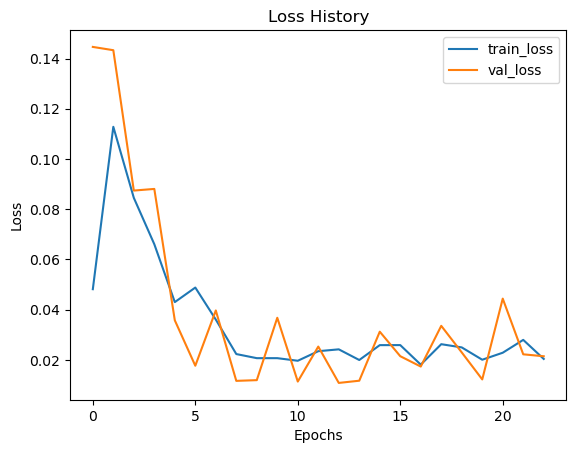

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

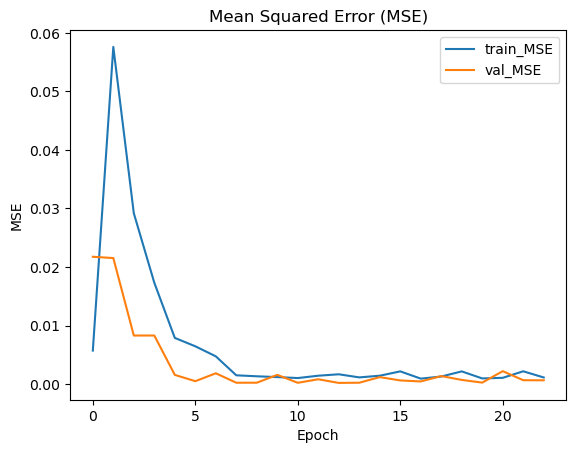

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

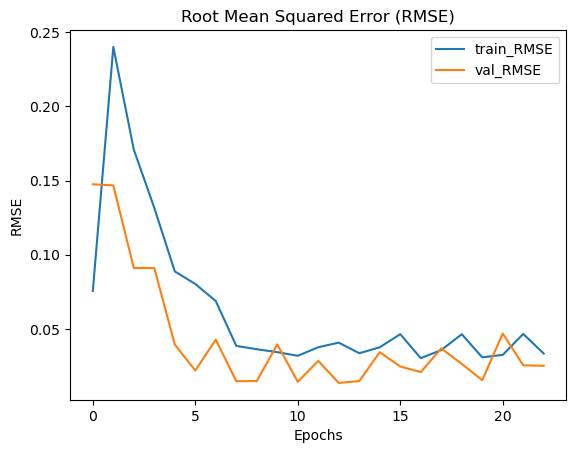

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

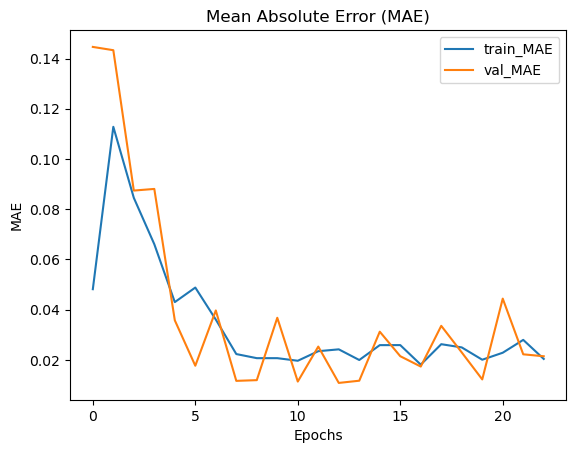

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

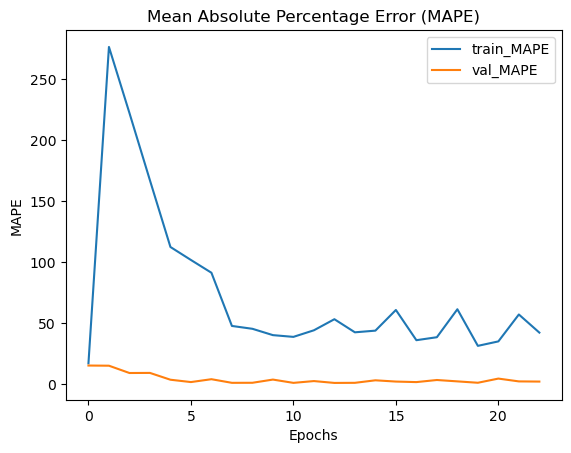

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:29:24.181555: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


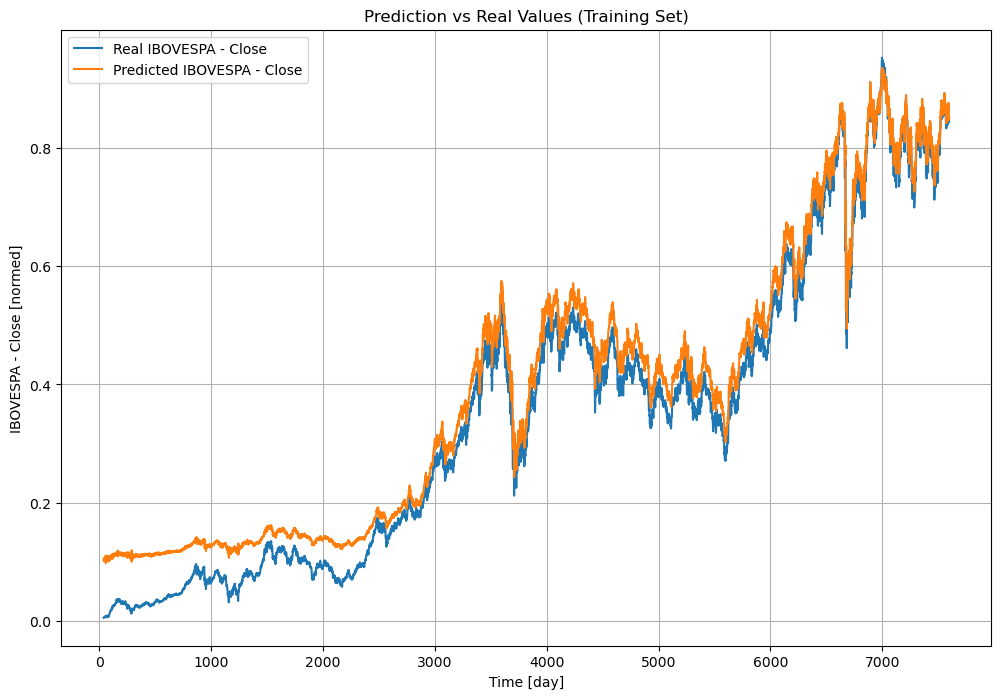

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


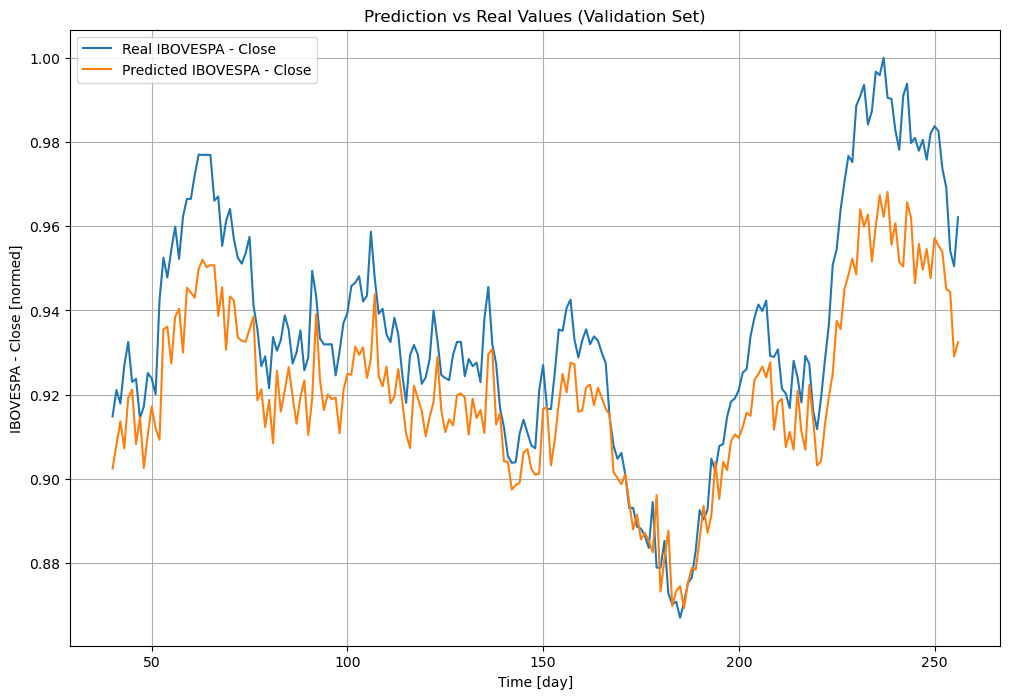

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


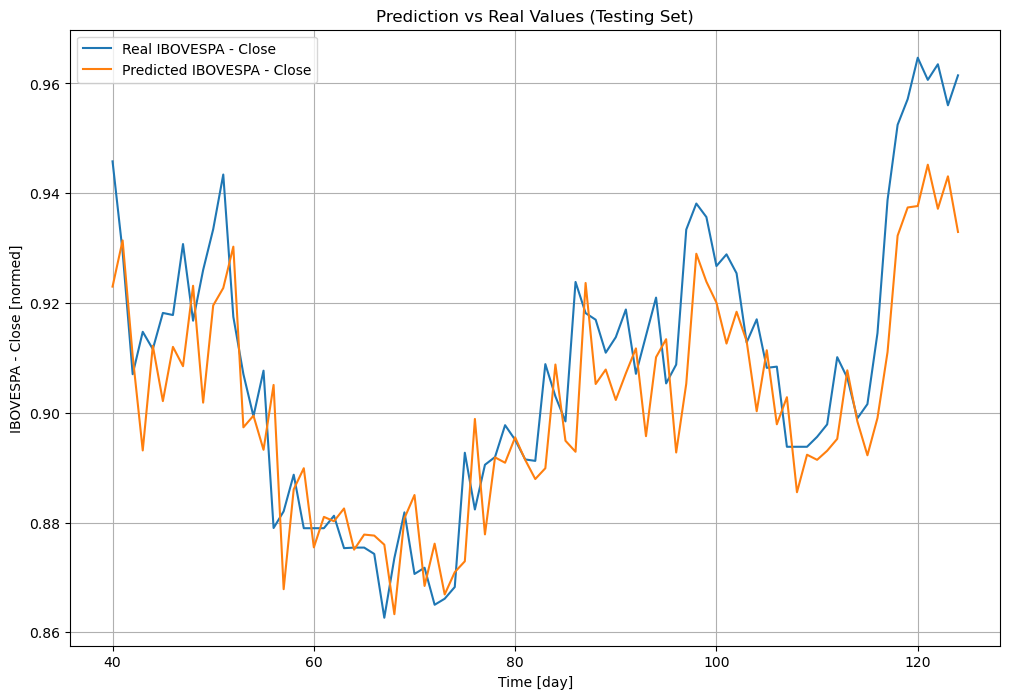

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

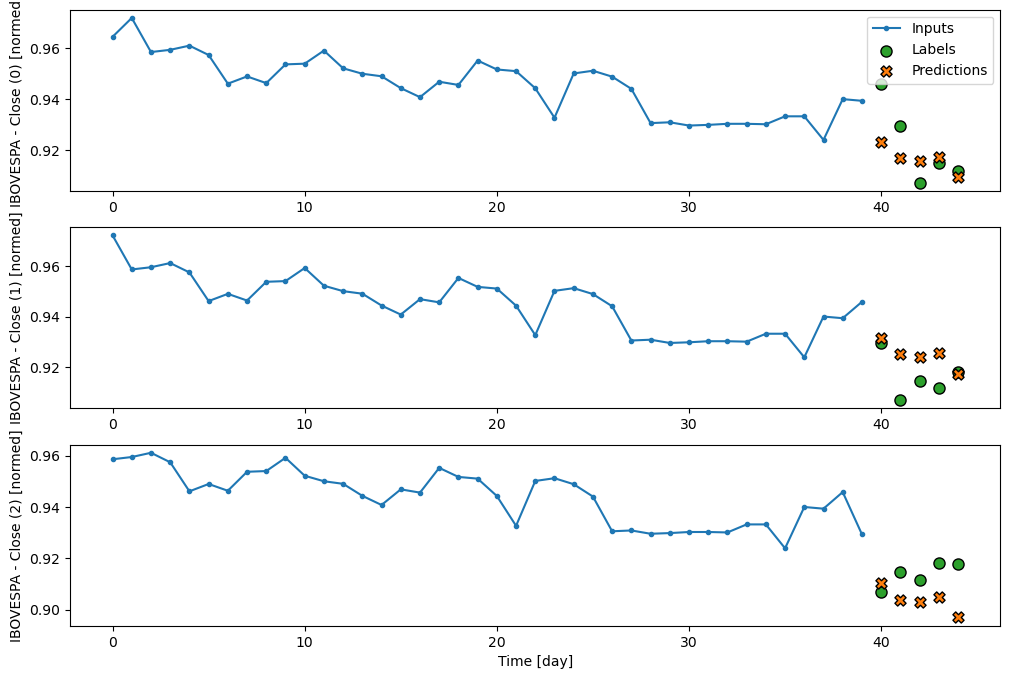

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:39s:263ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step


array([[[0.9229869 , 0.9229869 , 0.9229869 , ..., 0.9229869 ,
         0.9229869 , 0.9229869 ],
        [0.9165773 , 0.9165773 , 0.9165773 , ..., 0.9165773 ,
         0.9165773 , 0.9165773 ],
        [0.9156639 , 0.9156639 , 0.9156639 , ..., 0.9156639 ,
         0.9156639 , 0.9156639 ],
        [0.91716325, 0.91716325, 0.91716325, ..., 0.91716325,
         0.91716325, 0.91716325],
        [0.9092014 , 0.9092014 , 0.9092014 , ..., 0.9092014 ,
         0.9092015 , 0.9092015 ]],

       [[0.9314041 , 0.9314041 , 0.9314041 , ..., 0.9314041 ,
         0.9314041 , 0.9314041 ],
        [0.9250779 , 0.9250779 , 0.9250779 , ..., 0.9250779 ,
         0.9250779 , 0.9250779 ],
        [0.92401665, 0.92401665, 0.92401665, ..., 0.92401665,
         0.92401665, 0.92401665],
        [0.92545354, 0.92545354, 0.92545354, ..., 0.92545354,
         0.92545354, 0.92545354],
        [0.91740155, 0.91740155, 0.91740155, ..., 0.91740155,
         0.9174018 , 0.9174018 ]],

       [[0.91037095, 0.91037095, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')